<a href="https://colab.research.google.com/github/lukman-17/Inventory-Analysis/blob/main/Inventory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

folder_path = '/content/drive/MyDrive/inventory'
print(os.listdir(folder_path))


['PurchasesFINAL12312016.csv', 'InvoicePurchases12312016 (1).csv', '2017PurchasePricesDec.csv', 'BegInvFINAL12312016.csv', 'EndInvFINAL12312016.csv', 'SalesFINAL12312016.csv', 'MergedInventoryData.csv']


In [ ]:
# Read each file from the folder

beginning_inventory = pd.read_csv(os.path.join(folder_path, 'BegInvFINAL12312016.csv'))
ending_inventory = pd.read_csv(os.path.join(folder_path, 'EndInvFINAL12312016.csv'))
purchase_invoices = pd.read_csv(os.path.join(folder_path, 'InvoicePurchases12312016 (1).csv'))
purchase_price = pd.read_csv(os.path.join(folder_path, 'PurchasesFINAL12312016.csv'))
sales_data = pd.read_csv(os.path.join(folder_path, 'SalesFINAL12312016.csv'))
purchase_prices_df = pd.read_csv(os.path.join(folder_path,'2017PurchasePricesDec.csv'))


In [ ]:
beginning_inventory.shape

(206529, 9)

In [ ]:
purchase_price.shape

(2372474, 16)

In [ ]:
purchase_invoices.shape

(5543, 10)

In [ ]:
purchase_price.shape

(2372474, 16)

In [ ]:
sales_data.shape

(1048575, 14)

In [ ]:
purchase_prices_df.shape

(12261, 9)

In [ ]:
purchase_price['InventoryId'].value_counts()

,count
InventoryId,
73_DONCASTER_8068,180
73_DONCASTER_3545,178
76_DONCASTER_1233,175
76_DONCASTER_5364,174
67_EANVERNESS_3545,171
...,...
42_BLACK HOLLOW_3346,1
1_HARDERSFIELD_1071,1
75_BARNCOMBE_3346,1


In [ ]:
purchase_price['InventoryId'].duplicated().sum()

2126567

In [ ]:
beginning_inventory.head(5)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [ ]:
purchase_invoices.head(4)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN


In [ ]:
sales_data.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [ ]:
ending_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [ ]:
beginning_inventory['Description'].unique().sum()

'Gekkeikan Black & Gold SakeCanadian Club 1858 VAPHerradura Silver TequilaHerradura Reposado TequilaNo. 3 London Dry GinThree Olives Tomato VodkaThree Olives Espresso VodkaThree Olives Loopy VodkaBelvedere VodkaTarantula Azul Tequila GiftGrey Goose VodkaGentleman Jack Gift PackGentleman Jack1800 Anejo TequilaWild Turkey Russell\'s RSVMilagro Anejo TequilaCold River GinTullamore Dew 12 Yr OldGran Patron Platinum TequilDeKuyper Root Beer SchnappsSvedka Citron VodkaSauza Extra Gold TequilaKamora Coffee Gift PackMilagro Tequila Reposado SBRMilagro Tequila Anejo SBROld Mexico Gold TequilaCrown Royal Canadian WhiskyThe Glenlivet 12 Yr Gift PkTequila Rose Strawberry GiftPunt e Mes Sweet VermouthCarolans Irish Cr Gift SetEffen Cucumber VodkaCrown Royal w/2 GlassesAperol LiqueurBaileys Irish Cream w/4 GlssArdbeg Corryvreckan ScotchSmirnoff 80 ProofKahlua MidnightWild Turkey American HoneyJose Cuervo EspecialAbsolut CitronHennessy ParadisCrystal Head VodkaIl Tramonto LimoncelloLicor 43 Vanilla L

In [ ]:
print("Purchase Invoices Info:")
print(purchase_invoices.info())
print("\nFirst few rows:")
print(purchase_invoices.head())

# Total cost of purchases
total_cost = purchase_invoices['Dollars'].sum()

# Total quantity of products purchased
total_quantity = purchase_invoices['Quantity'].sum()

# Display results
print(f"\nTotal Purchase Cost: ${total_cost:,.2f}")
print(f"Total Quantity Purchased: {total_quantity:,}")

Purchase Invoices Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB
None

First few rows:
   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09 

In [ ]:
# Group by VendorName or Classification for breakdown
vendor_summary = purchase_invoices.groupby('VendorName').agg(
    Total_Cost=('Dollars', 'sum'),
    Total_Quantity=('Quantity', 'sum')
).sort_values(by='Total_Cost', ascending=False)

print("\nCost and Quantity by Vendor:")
print(vendor_summary.head(10))

# Optionally, export the summary to CSV
vendor_summary.to_csv("vendor_summary.csv")



Cost and Quantity by Vendor:
                              Total_Cost  Total_Quantity
VendorName                                              
DIAGEO NORTH AMERICA INC     50959796.85         5459788
MARTIGNETTI COMPANIES        27821473.91         2637275
JIM BEAM BRANDS COMPANY      24203151.05         2737165
PERNOD RICARD USA            24124091.56         1647558
BACARDI USA INC              17624378.72         1427075
CONSTELLATION BRANDS INC     15573917.90         2325892
BROWN-FORMAN CORP            13529433.08         1006122
ULTRA BEVERAGE COMPANY LLP   13210613.93         1077527
E & J GALLO WINERY           12289608.09         1858260
M S WALKER INC               10935817.30         1372841


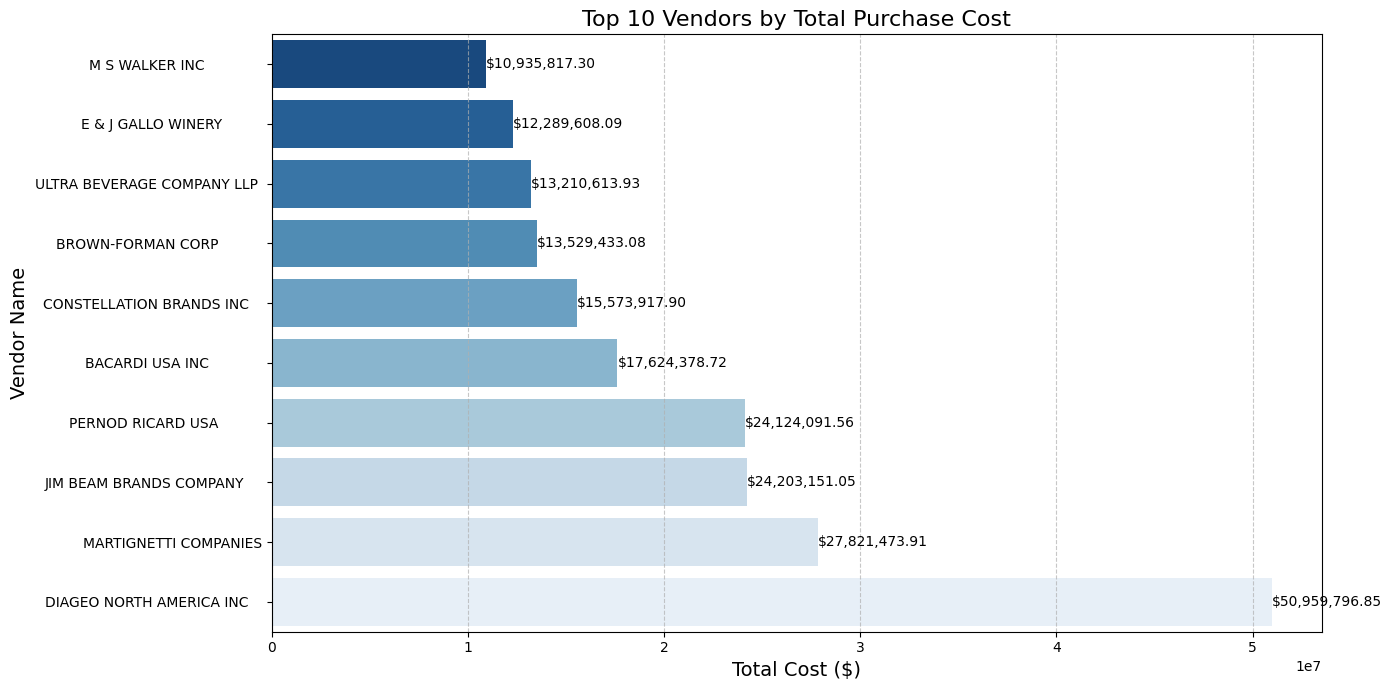

In [ ]:
top_vendors = vendor_summary.head(10).sort_values('Total_Cost', ascending=True)

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(14, 7))
sns.barplot(
    x='Total_Cost',
    y=top_vendors.index,
    data=top_vendors,
    palette='Blues_r'
)

# Add annotations to show exact values on each bar
for index, value in enumerate(top_vendors['Total_Cost']):
    plt.text(value + 1000, index, f"${value:,.2f}", va='center', fontsize=10, color='black')

# Add title, labels, and grid
plt.title('Top 10 Vendors by Total Purchase Cost', fontsize=16)
plt.xlabel('Total Cost ($)', fontsize=14)
plt.ylabel('Vendor Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


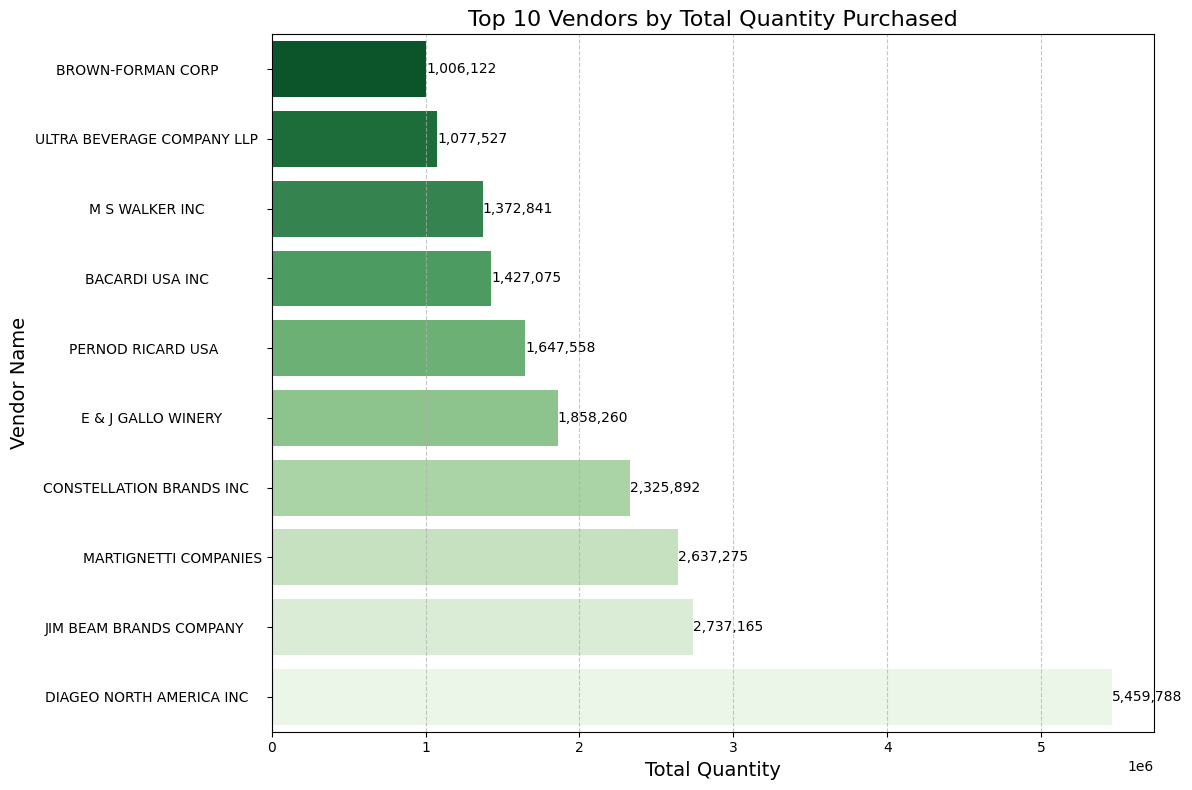

In [ ]:
# Sort top vendors by Total Quantity in ascending order
top_vendors_quantity = vendor_summary.head(10).sort_values('Total_Quantity', ascending=True)

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Total_Quantity',
    y=top_vendors_quantity.index,
    data=top_vendors_quantity,
    palette='Greens_r'
)

# Add annotations to show exact values on each bar
for index, value in enumerate(top_vendors_quantity['Total_Quantity']):
    plt.text(value + 10, index, f"{value:,}", va='center', fontsize=10, color='black')

# Add title, labels, and grid
plt.title('Top 10 Vendors by Total Quantity Purchased', fontsize=16)
plt.xlabel('Total Quantity', fontsize=14)
plt.ylabel('Vendor Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


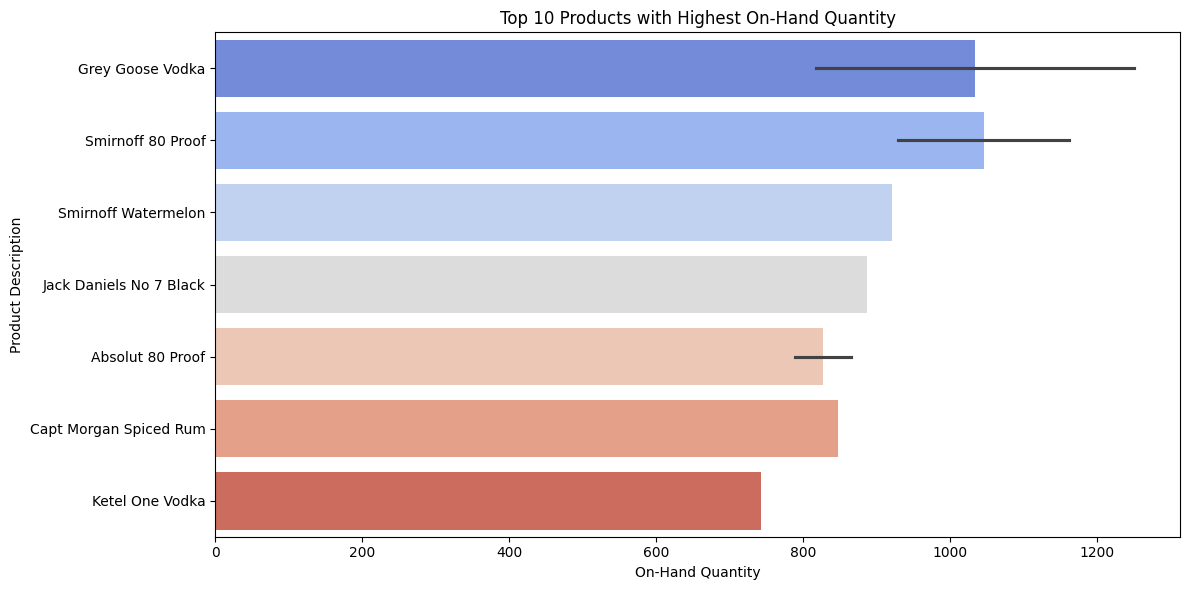

In [ ]:
top_products = beginning_inventory.sort_values(by='onHand', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='onHand', y='Description', data=top_products, palette='coolwarm')
plt.title('Top 10 Products with Highest On-Hand Quantity')
plt.xlabel('On-Hand Quantity')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


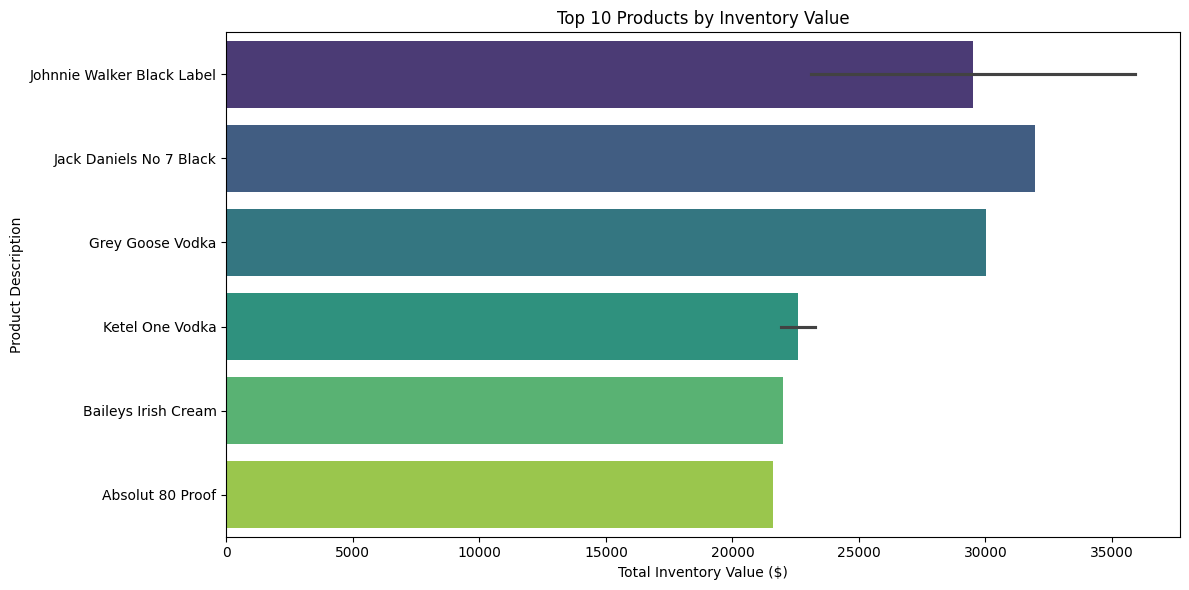

In [ ]:
# Add Inventory Value column
beginning_inventory['InventoryValue'] = beginning_inventory['onHand'] * beginning_inventory['Price']

# Top 10 high-value products
high_value_products = beginning_inventory.sort_values(by='InventoryValue', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='InventoryValue', y='Description', data=high_value_products, palette='viridis')
plt.title('Top 10 Products by Inventory Value')
plt.xlabel('Total Inventory Value ($)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


In [ ]:
# Aggregate data by Store
store_summary = beginning_inventory.groupby('Store').agg(
    Total_Quantity=('onHand', 'sum'),
    Total_Value=('InventoryValue', 'sum')
).sort_values(by='Total_Value', ascending=False)


print(store_summary)



       Total_Quantity  Total_Value
Store                             
34             153852   3291170.24
73             162551   3142497.36
67             158996   3079578.63
66             149314   2973033.90
76             140208   2952418.44
...               ...          ...
78              21395    264342.71
18              18777    250850.23
29              18328    220660.30
5               17968    218720.64
3                8379    132241.23

[79 rows x 2 columns]


Sales


In [ ]:
# Convert 'SalesDate' to datetime format
sales_data['SalesDate'] = pd.to_datetime(sales_data['SalesDate'])

# Check for missing values
print(sales_data.isnull().sum())

# Summary of numerical columns
print(sales_data[['SalesQuantity', 'SalesDollars', 'SalesPrice']].describe())


InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64
       SalesQuantity  SalesDollars    SalesPrice
count   1.048575e+06  1.048575e+06  1.048575e+06
mean    2.337619e+00  3.160420e+01  1.543162e+01
std     3.511492e+00  6.570249e+01  1.404967e+01
min     1.000000e+00  4.900000e-01  4.900000e-01
25%     1.000000e+00  1.099000e+01  8.990000e+00
50%     1.000000e+00  1.799000e+01  1.299000e+01
75%     2.000000e+00  3.199000e+01  1.899000e+01
max     4.320000e+02  1.327997e+04  4.999990e+03


In [ ]:
# Total sales amount
total_sales = sales_data['SalesDollars'].sum()
print(f"Total Sales: ${total_sales:.2f}")

# Total quantity sold
total_quantity = sales_data['SalesQuantity'].sum()
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: $33139375.29
Total Quantity Sold: 2451169


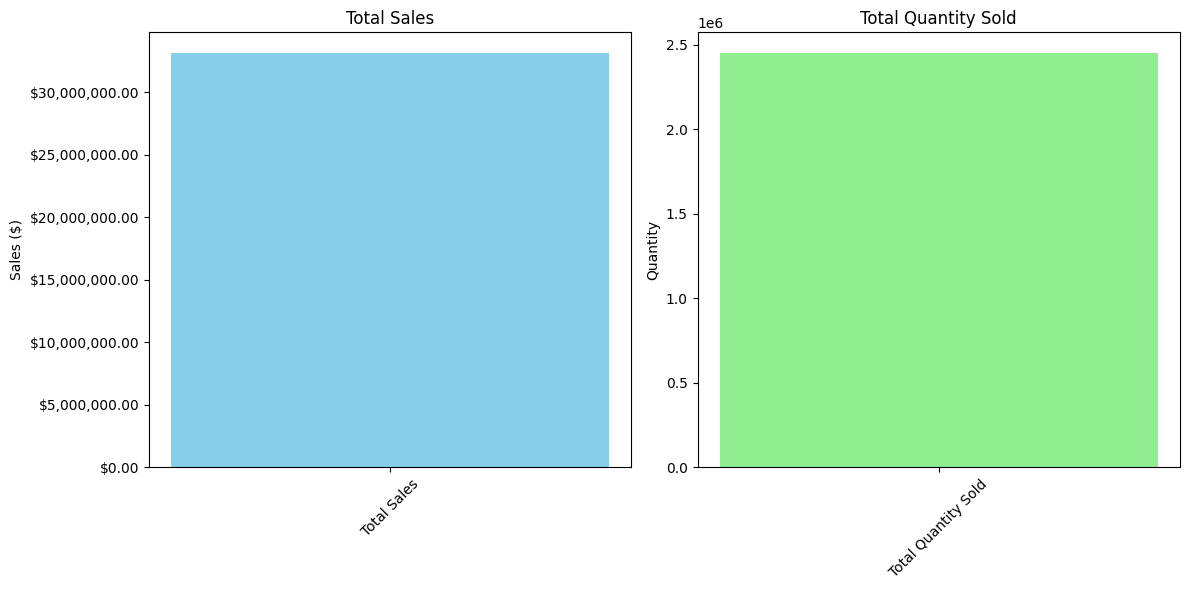

In [ ]:

# Sample data (replace with your actual data)
total_sales = 33139375.29
total_quantity = 2451169

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for Total Sales
axes[0].bar(['Total Sales'], [total_sales], color='skyblue')
axes[0].set_ylabel('Sales ($)')
axes[0].set_title('Total Sales')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.set_major_formatter('${x:,.2f}')


# Bar plot for Total Quantity Sold
axes[1].bar(['Total Quantity Sold'], [total_quantity], color='lightgreen')
axes[1].set_ylabel('Quantity')
axes[1].set_title('Total Quantity Sold')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

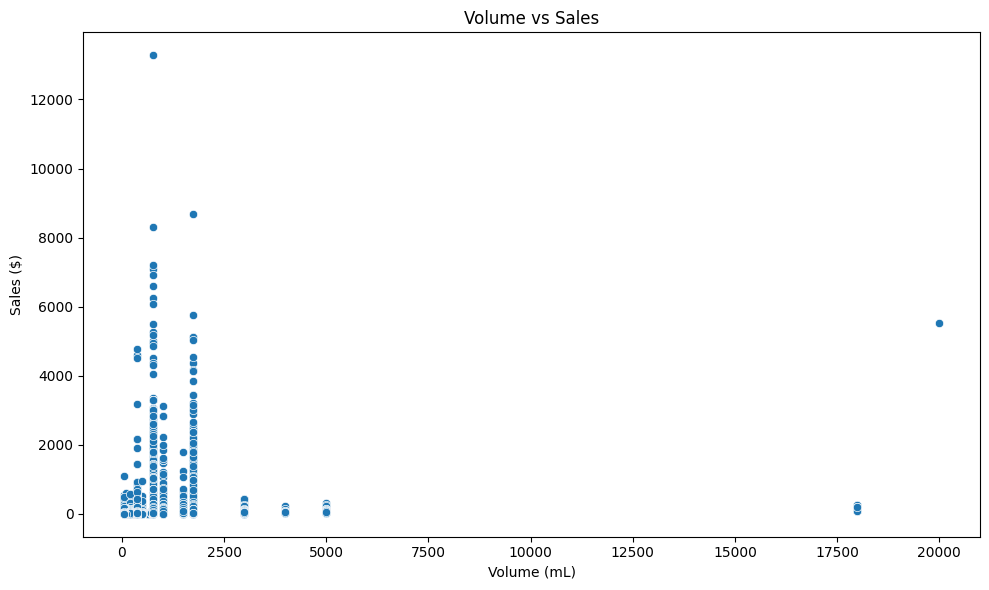

In [ ]:
# Scatter plot of Volume vs Sales Dollars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='SalesDollars', data=sales_data)
plt.title('Volume vs Sales')
plt.xlabel('Volume (mL)')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()


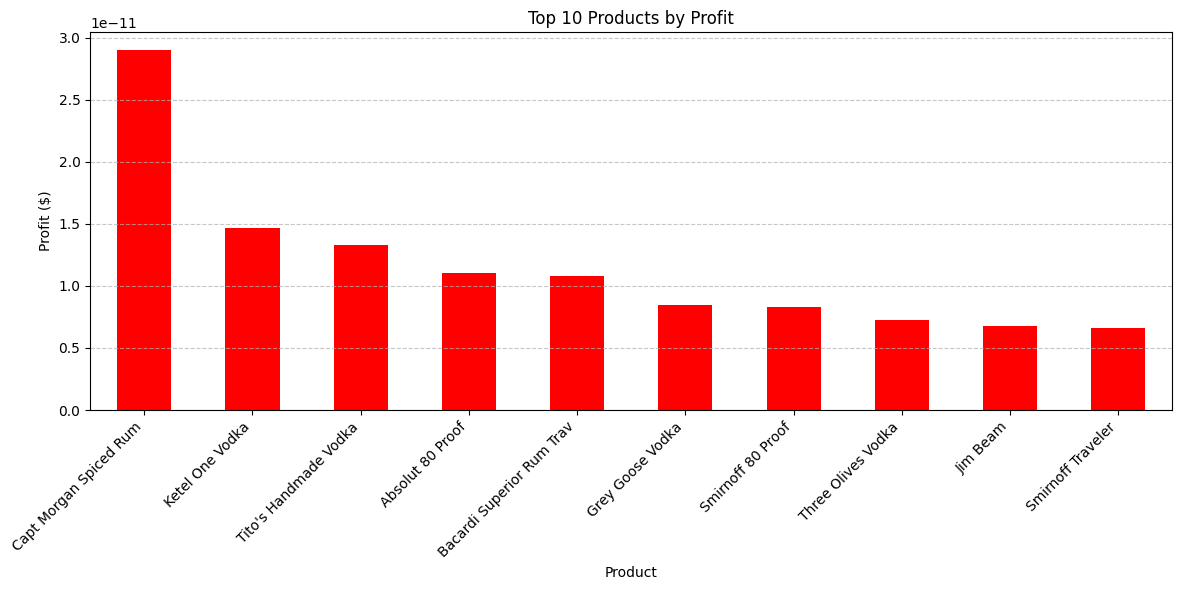

In [ ]:
sales_data['Profit'] = sales_data['SalesDollars'] - (sales_data['SalesQuantity'] * sales_data['SalesPrice'])

# Profit by product
profit_by_product = sales_data.groupby('Description')['Profit'].sum().sort_values(ascending=False)

# Bar plot of top products by profit
plt.figure(figsize=(12, 6))
profit_by_product.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Products by Profit')
plt.xlabel('Product')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


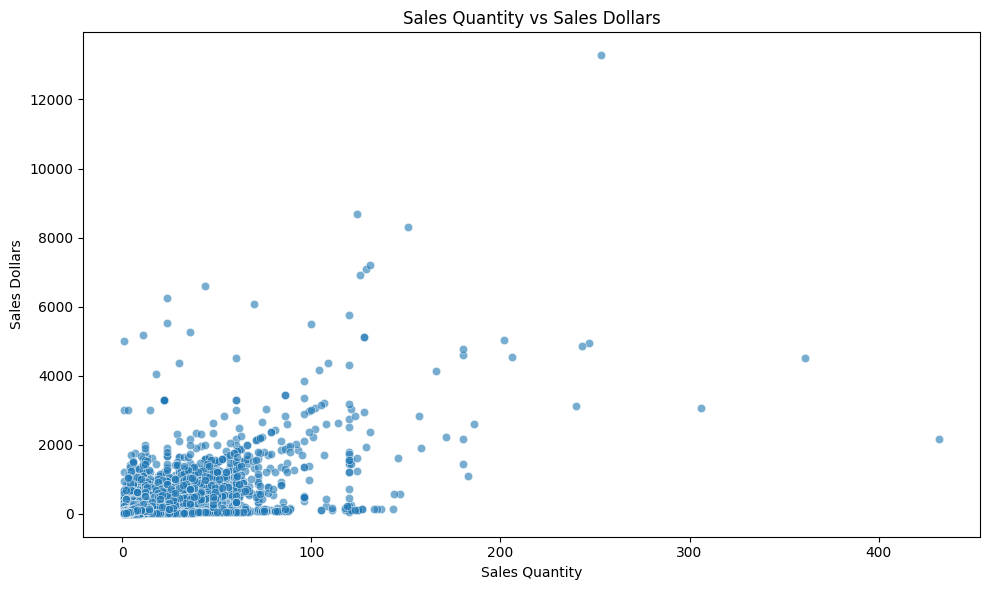

In [ ]:
# Scatter plot for Sales Quantity vs Sales Dollars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SalesQuantity', y='SalesDollars', data=sales_data, alpha=0.6)
plt.title('Sales Quantity vs Sales Dollars')
plt.xlabel('Sales Quantity')
plt.ylabel('Sales Dollars')
plt.tight_layout()
plt.show()


ending inventory


In [ ]:
top_products = ending_inventory.groupby('Description')['onHand'].sum().sort_values(ascending=False).head(10)
store_counts = ending_inventory['City'].value_counts().head(10)


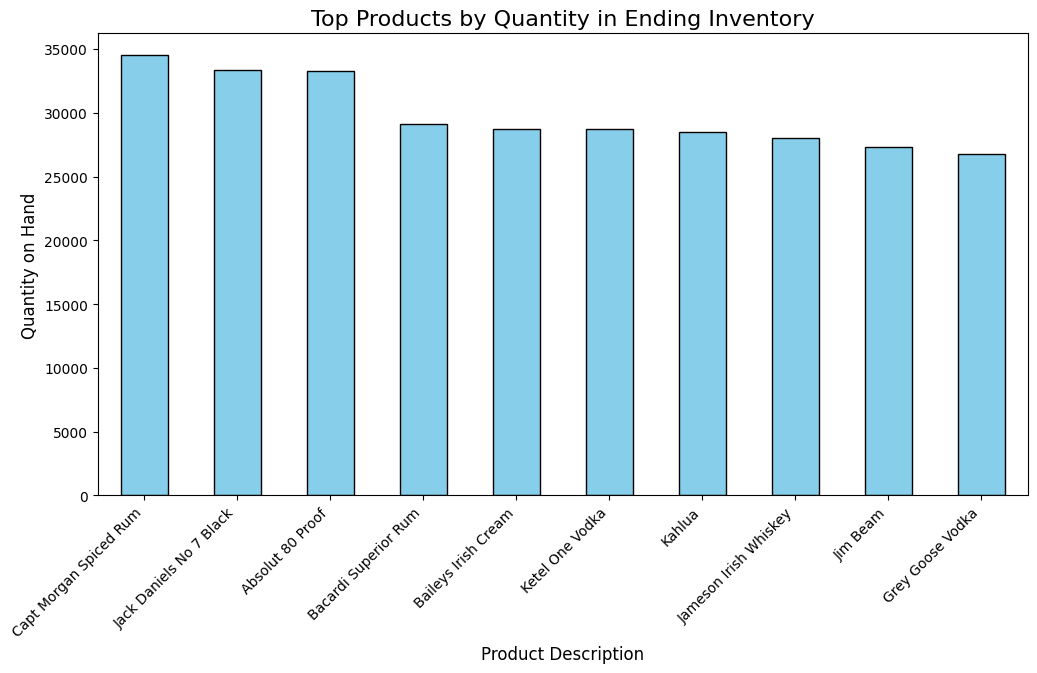

In [ ]:
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Products by Quantity in Ending Inventory', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Quantity on Hand', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

#Merge

In [ ]:
beginning_inventory = beginning_inventory[['InventoryId', 'onHand']]  # Adjust columns as needed
ending_inventory = ending_inventory[['InventoryId', 'onHand','Description']]
purchase_price = purchase_price[['InventoryId', 'PurchasePrice', 'Quantity', 'Dollars']]
sales_data = sales_data[['InventoryId', 'SalesQuantity', 'SalesDollars','VendorName']]

# Merge DataFrames on 'InventoryId'
merged_data = purchase_price.merge(sales_data, on='InventoryId', how='inner')
merged_data = merged_data.merge(beginning_inventory, on='InventoryId', how='inner', suffixes=('_begin', ''))
merged_data = merged_data.merge(ending_inventory, on='InventoryId', how='inner', suffixes=('', '_end'))

# Calculate additional metrics
merged_data['AverageOnHand'] = (merged_data['onHand'] + merged_data['onHand_end']) / 2
merged_data['InventoryTurnover'] = merged_data['SalesQuantity'] / merged_data['AverageOnHand']

# Create a new DataFrame for ABC Analysis
df_analysis = merged_data[['InventoryId', 'Description','Dollars', 'SalesQuantity', 'SalesDollars', 'AverageOnHand', 'InventoryTurnover','VendorName']]

# Save or preview the merged DataFrame
df_analysis.head()

,InventoryId,Description,Dollars,SalesQuantity,SalesDollars,AverageOnHand,InventoryTurnover,VendorName
0,69_MOUNTMEND_8412,Tequila Ocho Plata Fresno,214.26,1,49.99,4.0,0.250000,ALTAMAR BRANDS LLC
1,69_MOUNTMEND_8412,Tequila Ocho Plata Fresno,214.26,1,49.99,4.0,0.250000,ALTAMAR BRANDS LLC
2,69_MOUNTMEND_8412,Tequila Ocho Plata Fresno,214.26,2,99.98,4.0,0.500000,ALTAMAR BRANDS LLC
3,30_CULCHETH_5255,TGI Fridays Ultimte Mudslide,37.40,1,12.99,3.5,0.285714,AMERICAN VINTAGE BEVERAGE
4,30_CULCHETH_5255,TGI Fridays Ultimte Mudslide,37.40,1,12.99,3.5,0.285714,AMERICAN VINTAGE BEVERAGE


In [ ]:
df_analysis.shape

(23945436, 8)

In [ ]:
df_analysis.duplicated(subset=['InventoryId']).sum()

23803306

In [ ]:
df_analysis['InventoryId'].drop_duplicates(inplace=True)

In [ ]:
df_analysis.shape

(23945436, 8)

In [ ]:
df_analysis.drop_duplicates(inplace=True)
print(df_analysis.shape)

(2911038, 8)


ABC Analysis

In [ ]:
# Calculate the total sales for contribution
df_analysis['SalesContribution'] = (df_analysis['SalesDollars'] / df_analysis['SalesDollars'].sum()) * 100

# Sort items by SalesContribution in descending order
df_analysis = df_analysis.sort_values('SalesContribution', ascending=False).reset_index(drop=True)

# Calculate the cumulative percentage
df_analysis['CumulativeContribution'] = df_analysis['SalesContribution'].cumsum()

# Define ABC categories
def assign_abc_category(cumulative):
    if cumulative <= 60:
        return 'A'
    elif cumulative <= 85:
        return 'B'
    else:
        return 'C'

df_analysis['ABC_Category'] = df_analysis['CumulativeContribution'].apply(assign_abc_category)

# Save or preview the ABC analysis DataFrame
print(df_analysis[['InventoryId', 'SalesDollars', 'SalesContribution', 'CumulativeContribution', 'ABC_Category']].head())
df_analysis.to_csv('abc_analysis.csv', index=False)


         InventoryId  SalesDollars  SalesContribution  CumulativeContribution  \
0  15_WANBORNE_42188      13279.97           0.005528                0.005528   
1  15_WANBORNE_42188      13279.97           0.005528                0.011057   
2  15_WANBORNE_42188      13279.97           0.005528                0.016585   
3  15_WANBORNE_42188      13279.97           0.005528                0.022114   
4  15_WANBORNE_42188      13279.97           0.005528                0.027642   

  ABC_Category  
0            A  
1            A  
2            A  
3            A  
4            A  


In [ ]:
df_analysis['ABC_Category'].value_counts()

,count
ABC_Category,
C,1681905
B,765260
A,463873


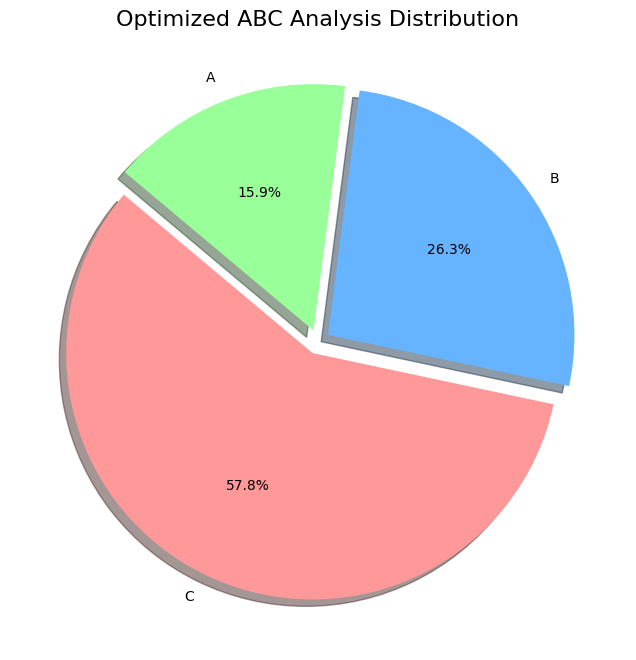

In [ ]:
import matplotlib.pyplot as plt

# Count the number of items in each category
abc_counts = df_analysis['ABC_Category'].value_counts()

# Define colors and explode values
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green
explode = [0.05, 0.05, 0.05]  # Slightly separate all slices for better visibility

# Create the optimized pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    abc_counts,
    labels=abc_counts.index,
    autopct=lambda p: f'{p:.1f}%',  # Format percentages
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True  # Add a shadow for a 3D effect
)

# Add title
plt.title('Optimized ABC Analysis Distribution', fontsize=16)

# Display the chart
plt.show()


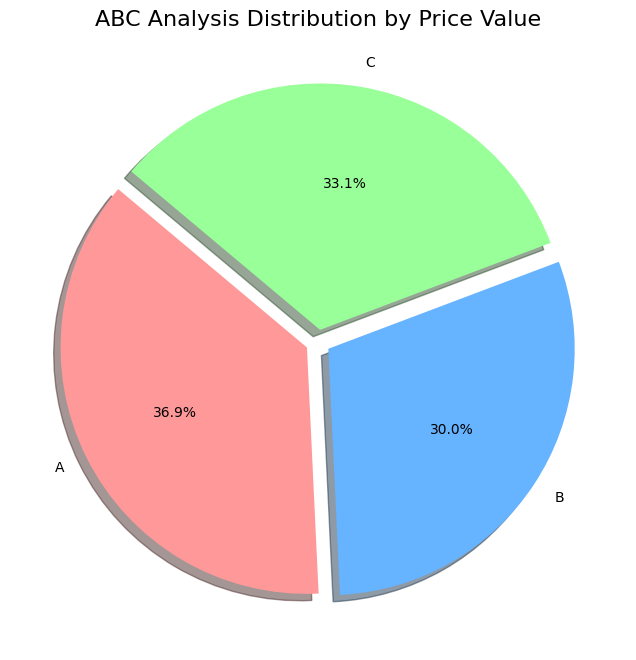

In [ ]:
import matplotlib.pyplot as plt

# Aggregate price values (Dollars) by ABC category
abc_price_values = df_analysis.groupby('ABC_Category')['Dollars'].sum()

# Define colors and explode values
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green
explode = [0.05, 0.05, 0.05]  # Slightly separate all slices for better visibility

# Create the optimized pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    abc_price_values,
    labels=abc_price_values.index,
    autopct=lambda p: f'{p:.1f}%',  # Format percentages
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True  # Add a shadow for a 3D effect
)

# Add title
plt.title('ABC Analysis Distribution by Price Value', fontsize=16)

# Display the chart
plt.show()


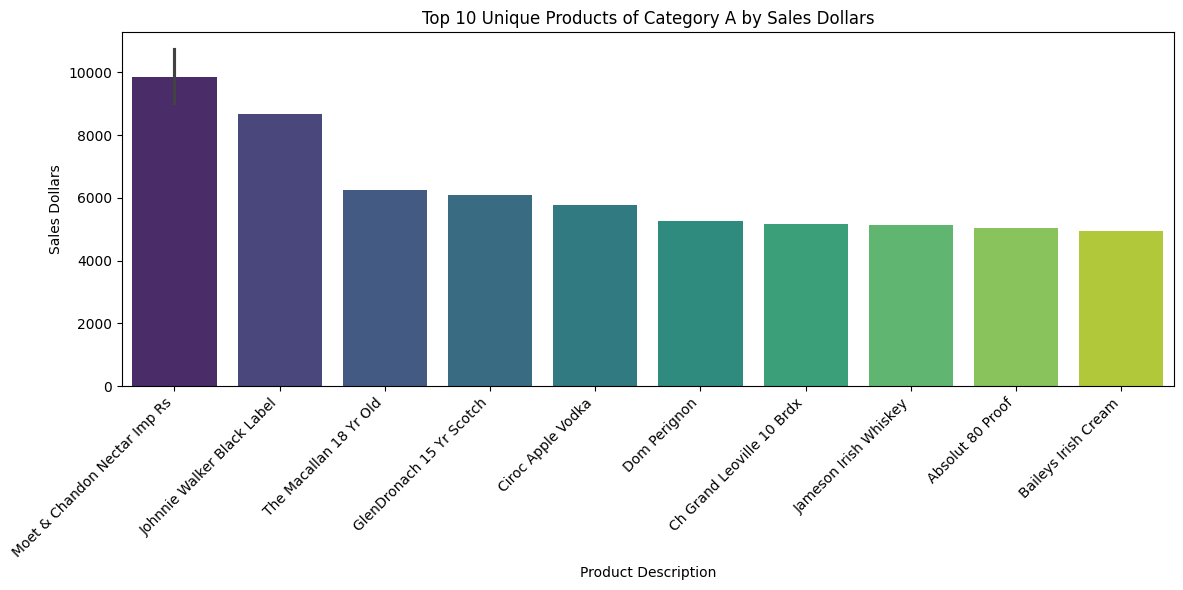

In [ ]:
# Filter for Category A products
category_a_products = df_analysis[df_analysis['ABC_Category'] == 'A']

# Get the top 10 unique products by SalesDollars
top_10_products = category_a_products.nlargest(250, 'SalesDollars')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Description', y='SalesDollars', data=top_10_products, palette='viridis')
plt.title('Top 10 Unique Products of Category A by Sales Dollars')
plt.xlabel('Product Description')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

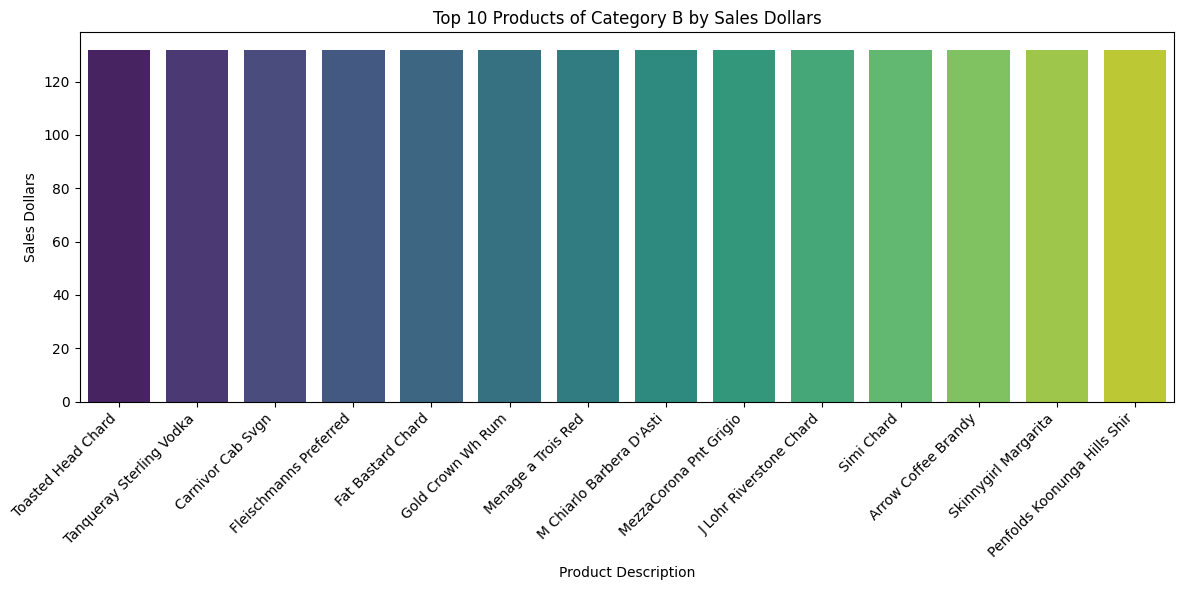

In [ ]:
# Filter for Category B products
category_b_products = df_analysis[df_analysis['ABC_Category'] == 'B']

# Sort by SalesDollars to get top 10
top_10_category_b = category_b_products.sort_values(by='SalesDollars', ascending=False).head(17)

plt.figure(figsize=(12, 6))
sns.barplot(x='Description', y='SalesDollars', data=top_10_category_b, palette='viridis')
plt.title('Top 10 Products of Category B by Sales Dollars')
plt.xlabel('Product Description')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

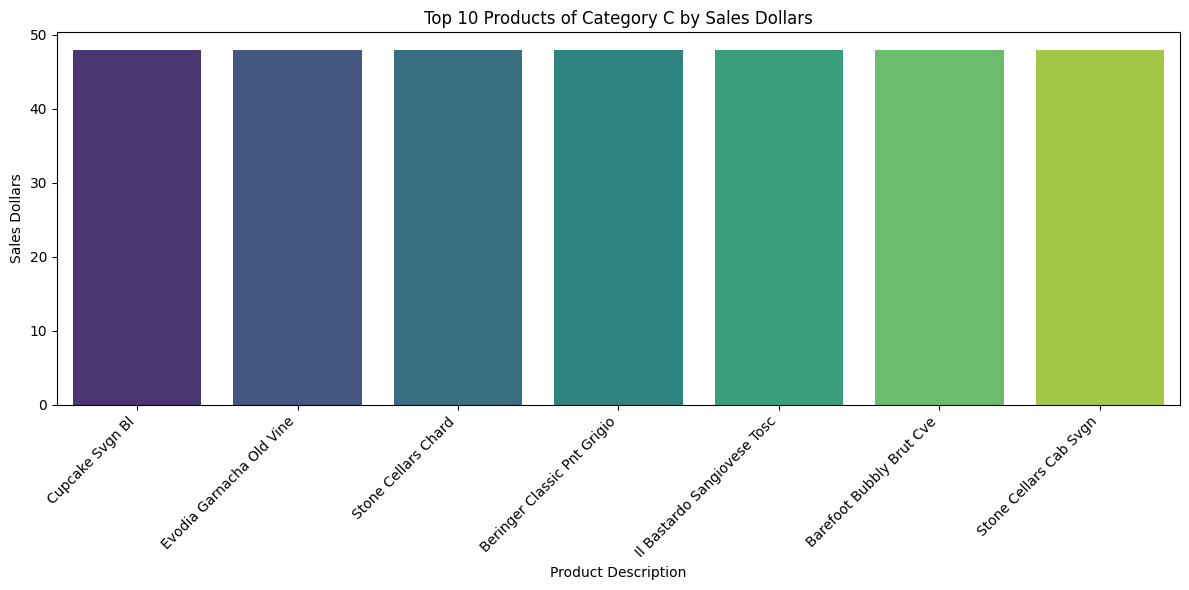

In [ ]:
category_c_products = df_analysis[df_analysis['ABC_Category'] == 'C']

# Sort by SalesDollars to get top 10
top_10_category_c = category_c_products.sort_values(by='SalesDollars', ascending=False).head(11)

plt.figure(figsize=(12, 6))
sns.barplot(x='Description', y='SalesDollars', data=top_10_category_c, palette='viridis')
plt.title('Top 10 Products of Category C by Sales Dollars')
plt.xlabel('Product Description')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Assuming df_analysis is already available and contains the necessary columns

# Drop duplicate values in the 'Dollars' column (optional step)
df_analysis_sorted_by_price = df_analysis.drop_duplicates(subset=['Dollars'])

# Assign ABC categories based on price value (Dollars)
df_analysis_sorted_by_price['ABC_Category_by_Price'] = pd.qcut(df_analysis_sorted_by_price['Dollars'], q=3, labels=['A', 'B', 'C'])

# Display the result to check the ABC categories
print(df_analysis_sorted_by_price[['InventoryId', 'Dollars', 'ABC_Category_by_Price']])

# Extract the product IDs or names for each ABC category based on price
abc_price_products = {
    'A': df_analysis_sorted_by_price[df_analysis_sorted_by_price['ABC_Category_by_Price'] == 'A']['InventoryId'].tolist(),
    'B': df_analysis_sorted_by_price[df_analysis_sorted_by_price['ABC_Category_by_Price'] == 'B']['InventoryId'].tolist(),
    'C': df_analysis_sorted_by_price[df_analysis_sorted_by_price['ABC_Category_by_Price'] == 'C']['InventoryId'].tolist()
}

# Display the products categorized by ABC category (based on price)
for category, products in abc_price_products.items():
    print(f"Category {category}: {products}")


                InventoryId  Dollars ABC_Category_by_Price
0         15_WANBORNE_42188   204.06                     A
1         15_WANBORNE_42188  6121.80                     C
2         15_WANBORNE_42188  8570.52                     C
3         15_WANBORNE_42188  3060.90                     C
4         15_WANBORNE_42188  2244.66                     C
...                     ...      ...                   ...
2868135  19_WINTERVALE_4149    33.64                     A
2872764    30_CULCHETH_3568    97.96                     A
2874068     53_HILLFAR_4959   110.05                     A
2898026     53_HILLFAR_6270    11.55                     A
2910538   69_MOUNTMEND_9109    32.68                     A

[29760 rows x 3 columns]
Category A: ['15_WANBORNE_42188', '69_MOUNTMEND_2753', '69_MOUNTMEND_2753', '69_MOUNTMEND_2753', '73_DONCASTER_42188', '50_MOUNTMEND_2989', '15_WANBORNE_3761', '15_WANBORNE_3761', '15_WANBORNE_3761', '48_NORFOLK_2589', '48_NORFOLK_2589', '48_NORFOLK_2589', '50_MOUNT

##VED Analysis

                  InventoryId  SalesQuantity  AvgSalesQuantity VED_Category
0           15_WANBORNE_42188            253         46.833333            V
1           15_WANBORNE_42188            253         46.833333            V
2           15_WANBORNE_42188            253         46.833333            V
3           15_WANBORNE_42188            253         46.833333            V
4           15_WANBORNE_42188            253         46.833333            V
...                       ...            ...               ...          ...
2911033   64_CESTERFIELD_3608              1          3.000000            D
2911034     69_MOUNTMEND_3608              1          9.666667            E
2911035     34_PITMERDEN_8910              1          7.583333            E
2911036  72_HARDERSFIELD_3606              1          9.266667            E
2911037     79_BALLYMENA_8910              1          4.714286            D

[2911038 rows x 4 columns]


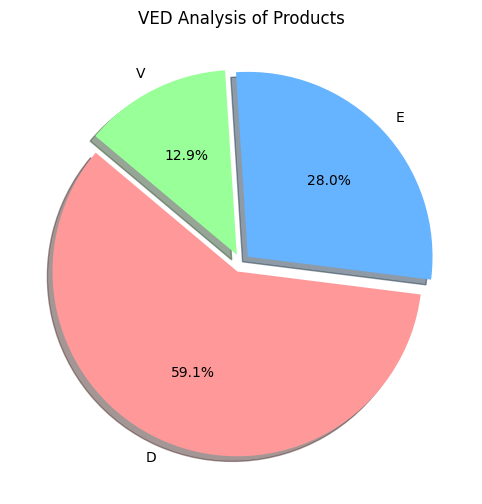

In [ ]:
# Calculate the average sales quantity
df_analysis['AvgSalesQuantity'] = df_analysis.groupby('InventoryId')['SalesQuantity'].transform('mean')

# Categorize items based on the average sales quantity
def assign_ved_category(avg_sales):
    if avg_sales >= 10:  # Define thresholds as per your business logic
        return 'V'
    elif avg_sales >= 5:
        return 'E'
    else:
        return 'D'

df_analysis['VED_Category'] = df_analysis['AvgSalesQuantity'].apply(assign_ved_category)

# Display the VED analysis results
print(df_analysis[['InventoryId', 'SalesQuantity', 'AvgSalesQuantity', 'VED_Category']])

# Visualization of VED Analysis
ved_counts = df_analysis['VED_Category'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green
explode = [0.05, 0.05, 0.05]  # Slightly separate all slices for better visibility
plt.figure(figsize=(8, 6))
plt.pie(ved_counts, labels=ved_counts.index,autopct=lambda p: f'{p:.1f}%',  # Format percentages
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True  )
plt.title('VED Analysis of Products')
plt.show()

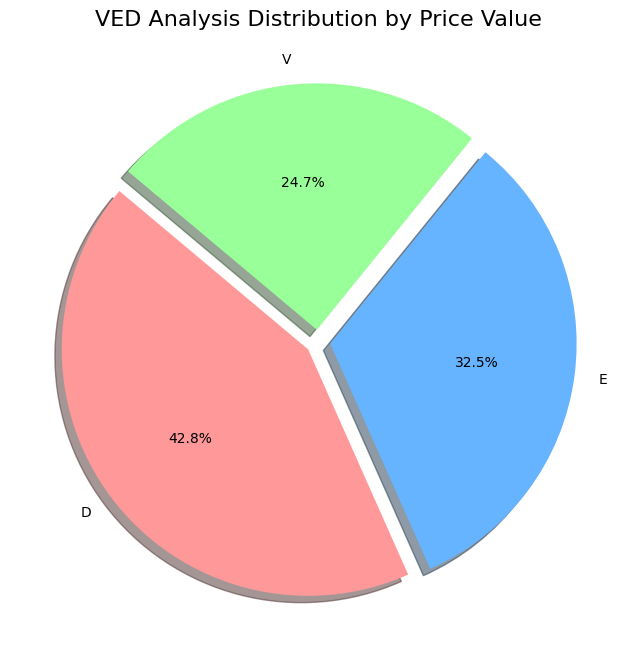

In [ ]:
# Assuming df_analysis is your DataFrame with 'VED_Category' and 'Dollars' columns
ved_price_values = df_analysis.groupby('VED_Category')['Dollars'].sum()

# Define colors and explode values
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green
explode = [0.05, 0.05, 0.05]  # Slightly separate all slices for better visibility

# Create the optimized pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    ved_price_values,
    labels=ved_price_values.index,
    autopct=lambda p: f'{p:.1f}%',  # Format percentages
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True  # Add a shadow for a 3D effect
)

# Add title
plt.title('VED Analysis Distribution by Price Value', fontsize=16)

# Display the chart
plt.show()

                  InventoryId ABC_Category VED_Category ABC_VED_Category
0           15_WANBORNE_42188            A            V               AV
1           15_WANBORNE_42188            A            V               AV
2           15_WANBORNE_42188            A            V               AV
3           15_WANBORNE_42188            A            V               AV
4           15_WANBORNE_42188            A            V               AV
...                       ...          ...          ...              ...
2911033   64_CESTERFIELD_3608            C            D               CD
2911034     69_MOUNTMEND_3608            C            E               CE
2911035     34_PITMERDEN_8910            C            E               CE
2911036  72_HARDERSFIELD_3606            C            E               CE
2911037     79_BALLYMENA_8910            C            D               CD

[2911038 rows x 4 columns]
ABC_VED_Category
AD    197.449087
AE    254.768106
AV    452.839264
BD     74.724110
BE     83.1

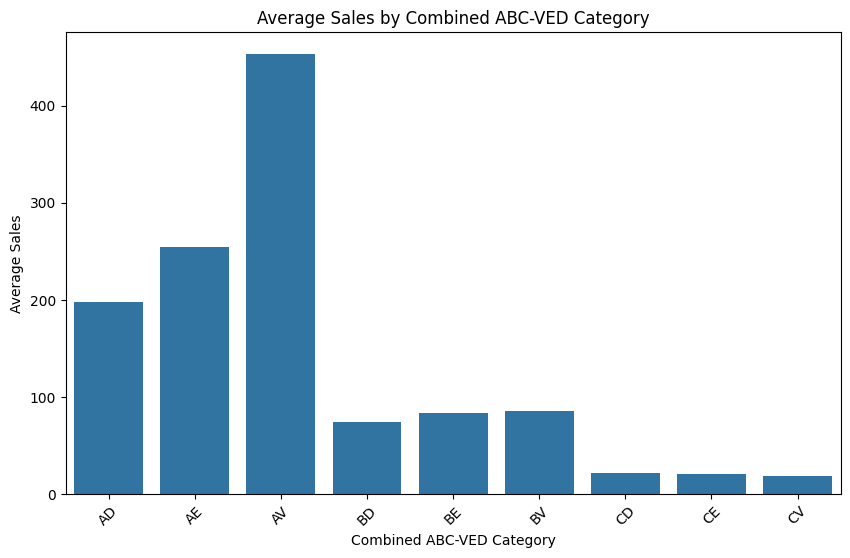

In [ ]:
# Combine ABC and VED analysis for a more comprehensive view
df_analysis['ABC_VED_Category'] = df_analysis['ABC_Category'] + df_analysis['VED_Category']

# Display the combined categories
print(df_analysis[['InventoryId', 'ABC_Category','VED_Category', 'ABC_VED_Category']])


# Analyze patterns or trends in combined categories
# Example: Group by ABC_VED_Category and calculate the average sales
combined_category_summary = df_analysis.groupby('ABC_VED_Category')['SalesDollars'].mean()
print(combined_category_summary)

# Create visualizations as required, e.g., a bar plot of average sales by the combined category
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_category_summary.index, y=combined_category_summary.values)
plt.xlabel('Combined ABC-VED Category')
plt.ylabel('Average Sales')
plt.title('Average Sales by Combined ABC-VED Category')
plt.xticks(rotation=45)
plt.show()

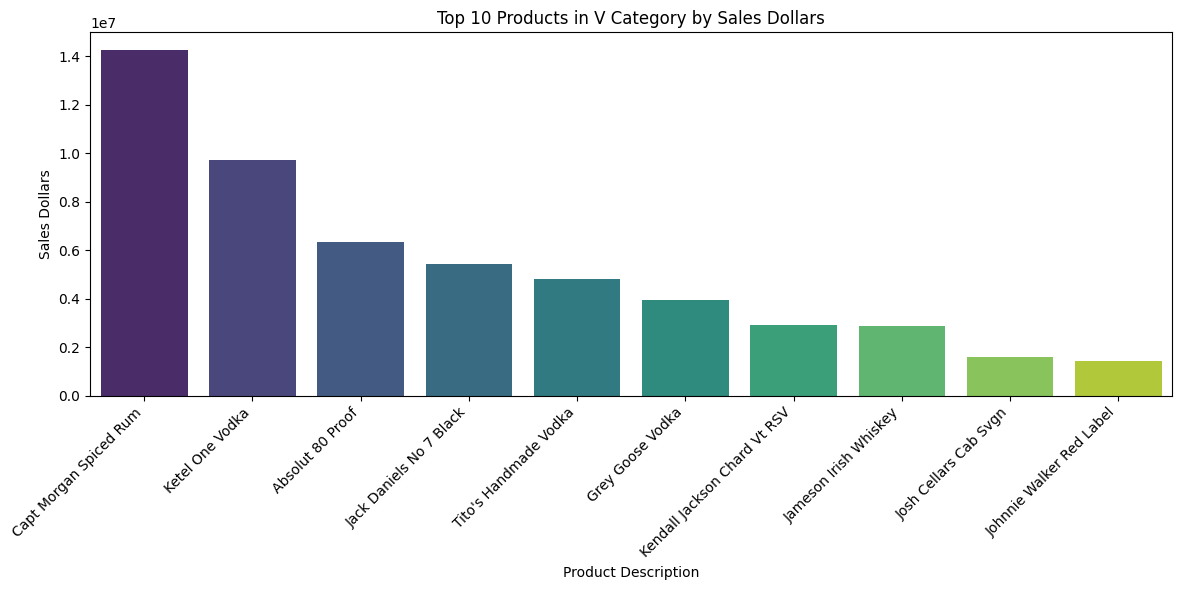

In [ ]:
# Filter for products in the 'V' category
v_category_products = df_analysis[df_analysis['VED_Category'] == 'V']

# Group by product description and sum sales dollars
top_products_v = v_category_products.groupby('Description')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_v.index, y=top_products_v.values, palette='viridis')
plt.title('Top 10 Products in V Category by Sales Dollars')
plt.xlabel('Product Description')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

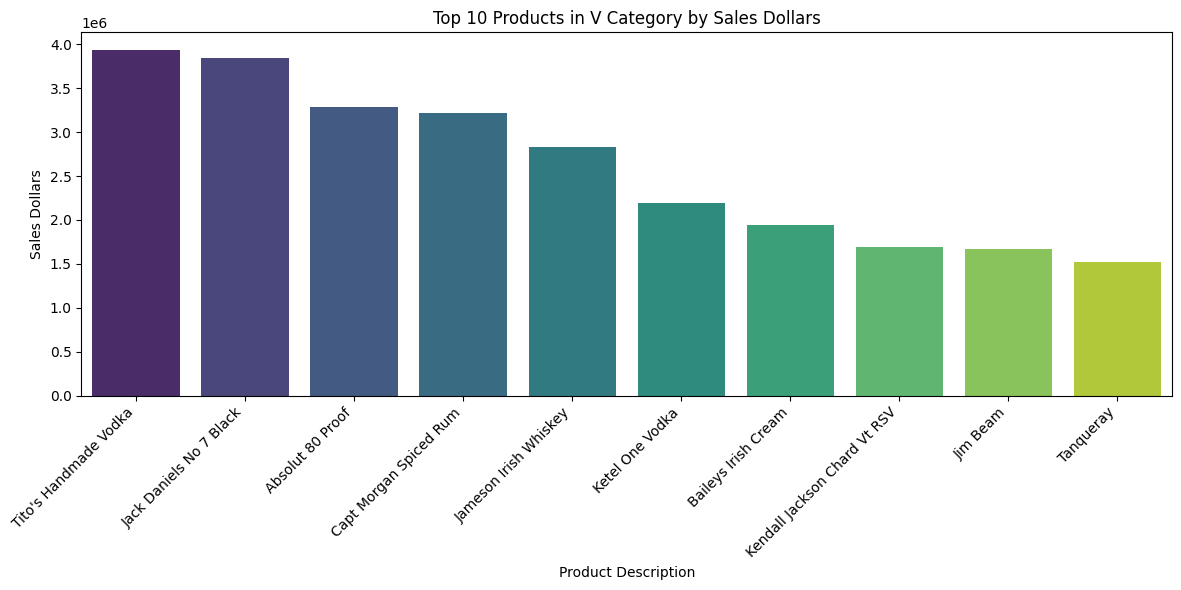

In [ ]:
# Filter for products in the 'V' category
v_category_products = df_analysis[df_analysis['VED_Category'] == 'E']

# Group by product description and sum sales dollars
top_products_v = v_category_products.groupby('Description')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_v.index, y=top_products_v.values, palette='viridis')
plt.title('Top 10 Products in E Category by Sales Dollars')
plt.xlabel('Product Description')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

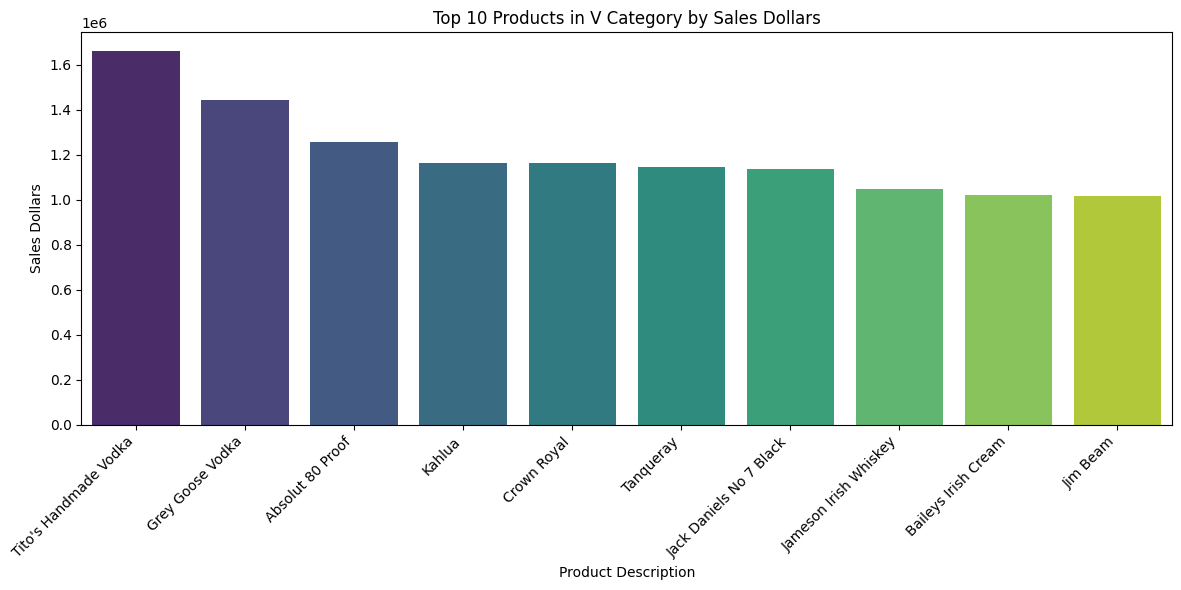

In [ ]:
# Filter for products in the 'V' category
v_category_products = df_analysis[df_analysis['VED_Category'] == 'D']

# Group by product description and sum sales dollars
top_products_v = v_category_products.groupby('Description')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_v.index, y=top_products_v.values, palette='viridis')
plt.title('Top 10 Products in D Category by Sales Dollars')
plt.xlabel('Product Description')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#HML Analysis

In [ ]:
quartiles = df_analysis['InventoryTurnover'].quantile([0.40, 0.76])

# Assign HML categories
def assign_hml_category(turnover):
    if turnover >= quartiles[0.76]:
        return 'High'
    elif turnover >= quartiles[0.40]:
        return 'Medium'
    else:
        return 'Low'

df_analysis['HML_Category'] = df_analysis['InventoryTurnover'].apply(assign_hml_category)


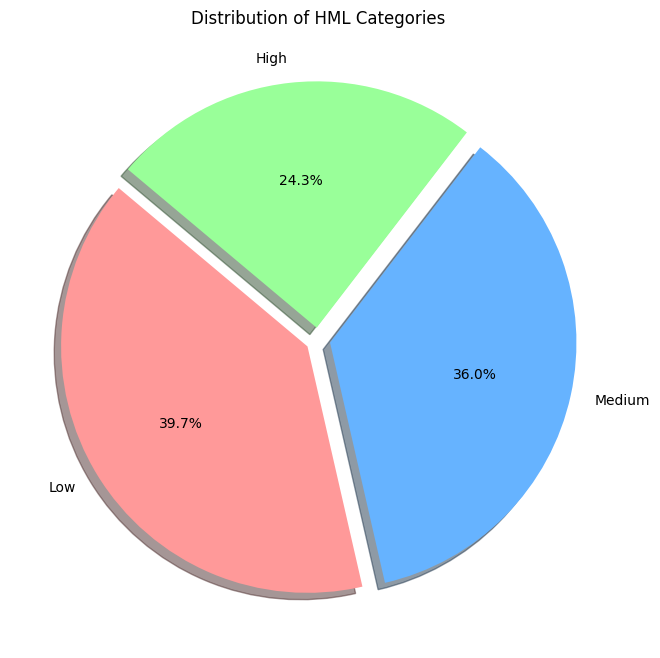

In [ ]:
# Assuming df_analysis is your DataFrame
hml_counts = df_analysis['HML_Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(hml_counts, labels=hml_counts.index,autopct=lambda p: f'{p:.1f}%',  # Format percentages
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True )
plt.title('Distribution of HML Categories')
plt.show()

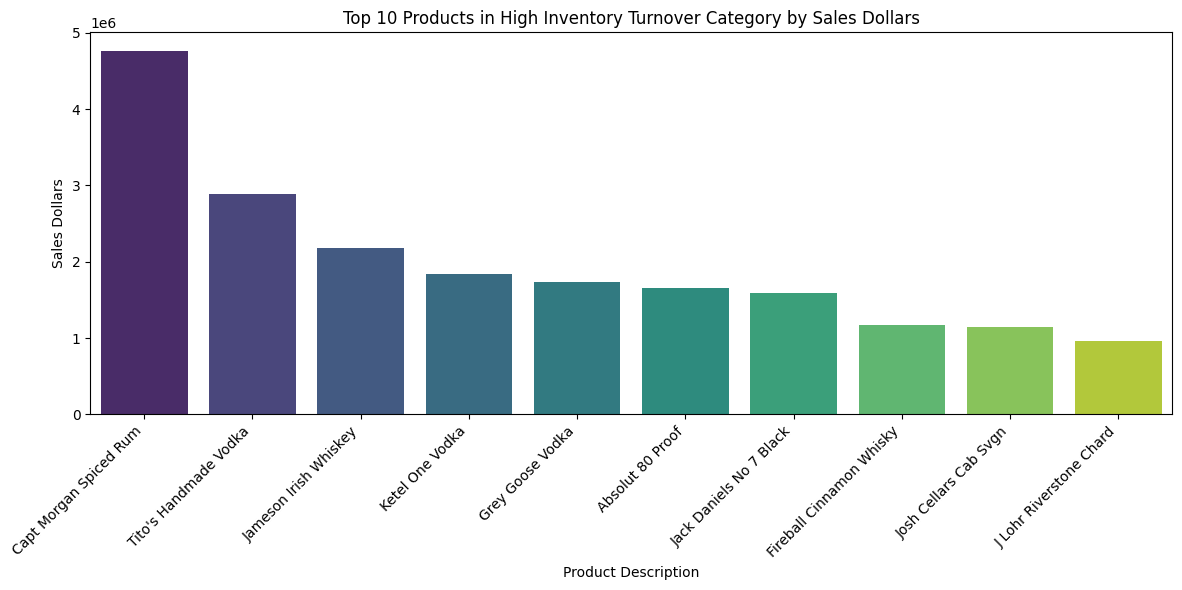

In [ ]:
# Filter for products in the 'High' category
high_category_products = df_analysis[df_analysis['HML_Category'] == 'High']

# Group by product description and sum sales dollars
top_products_high = high_category_products.groupby('Description')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_high.index, y=top_products_high.values, palette='viridis')
plt.title('Top 10 Products in High Inventory Turnover Category by Sales Dollars')
plt.xlabel('Product Description')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

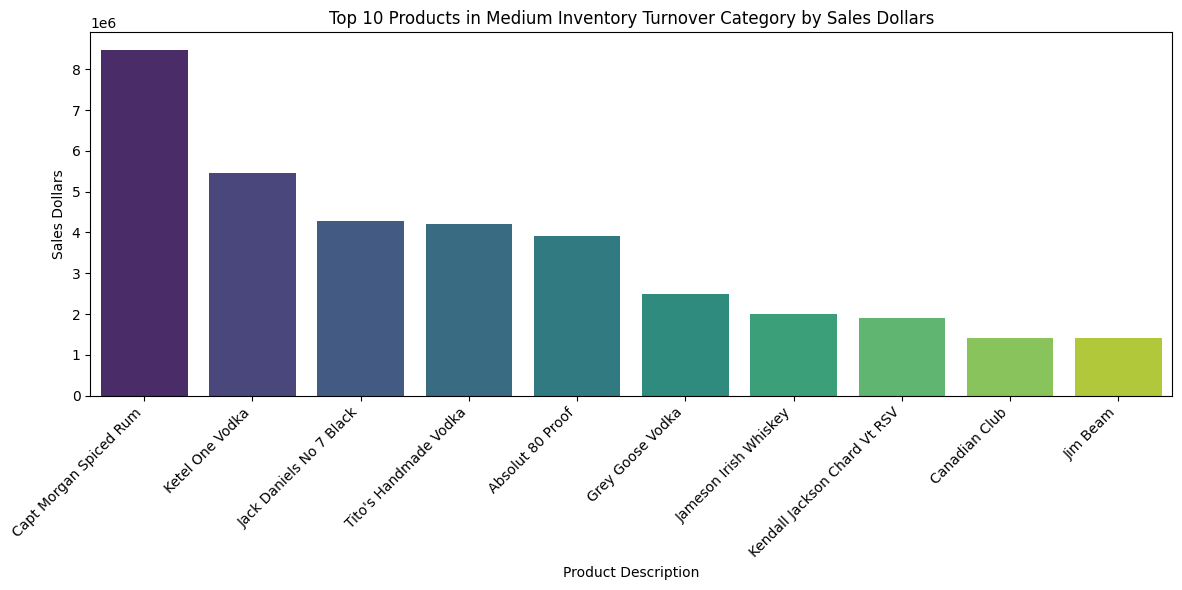

In [ ]:
# Filter for products in the 'Medium' category
Medium_category_products = df_analysis[df_analysis['HML_Category'] == 'Medium']

# Group by product description and sum sales dollars
top_products_medium = Medium_category_products.groupby('Description')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_medium.index, y=top_products_medium.values, palette='viridis')
plt.title('Top 10 Products in Medium Inventory Turnover Category by Sales Dollars')
plt.xlabel('Product Description')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

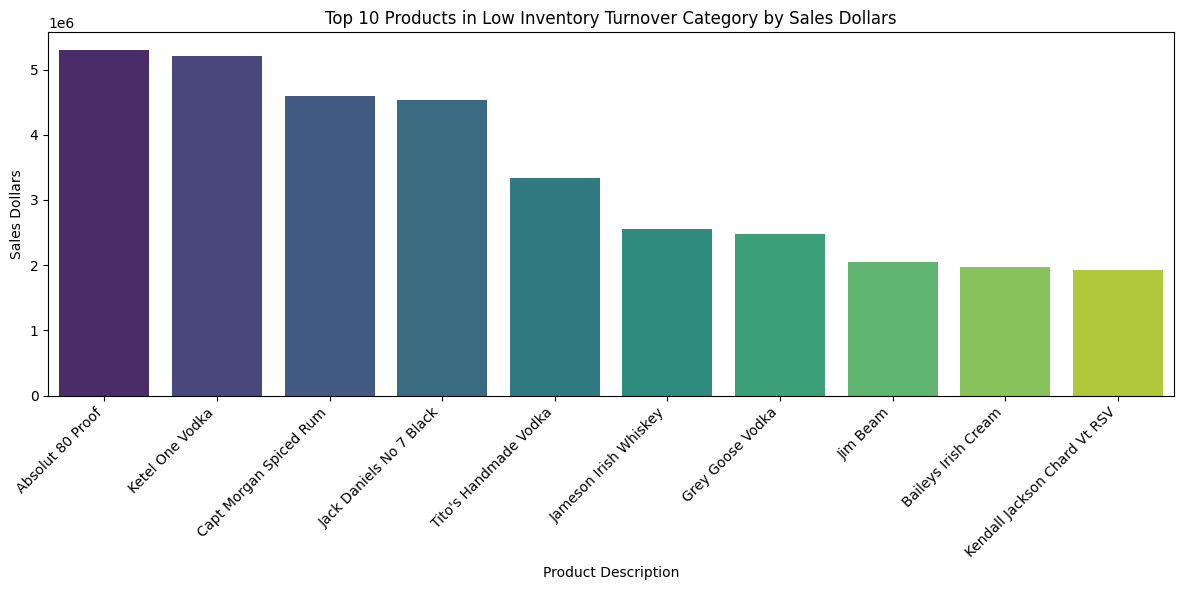

In [ ]:
  # Filter for products in the 'Low' category
low_category_products = df_analysis[df_analysis['HML_Category'] == 'Low']

# Group by product description and sum sales dollars
top_low_products = low_category_products.groupby('Description')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_low_products.index, y=top_low_products.values, palette='viridis')
plt.title('Top 10 Products in Low Inventory Turnover Category by Sales Dollars')
plt.xlabel('Product Description')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Combine

In [ ]:
# Combine ABC, VED, and HML analysis for a more granular view
df_analysis['ABC_VED_HML_Category'] = df_analysis['ABC_Category'] + df_analysis['VED_Category'] + df_analysis['HML_Category']
# Display combined categories
df_analysis[['InventoryId', 'ABC_Category', 'VED_Category', 'HML_Category', 'ABC_VED_HML_Category']]

,InventoryId,ABC_Category,VED_Category,HML_Category,ABC_VED_HML_Category
0,15_WANBORNE_42188,A,V,High,AVHigh
1,15_WANBORNE_42188,A,V,High,AVHigh
2,15_WANBORNE_42188,A,V,High,AVHigh
3,15_WANBORNE_42188,A,V,High,AVHigh
4,15_WANBORNE_42188,A,V,High,AVHigh
...,...,...,...,...,...
2911033,64_CESTERFIELD_3608,C,D,Low,CDLow
2911034,69_MOUNTMEND_3608,C,E,Low,CELow
2911035,34_PITMERDEN_8910,C,E,Low,CELow
2911036,72_HARDERSFIELD_3606,C,E,Low,CELow


ABC_VED_HML_Category
ADHigh      204.997936
ADLow       184.020057
ADMedium    195.931287
AEHigh      271.781998
AELow       222.455052
AEMedium    262.463276
AVHigh      635.354605
AVLow       325.025041
AVMedium    477.496634
BDHigh       74.995968
BDLow        73.382726
BDMedium     75.371564
BEHigh       88.359823
BELow        79.518633
BEMedium     83.991656
BVHigh       84.314990
BVLow        84.019739
BVMedium     89.441703
CDHigh       27.171257
CDLow        19.436178
CDMedium     21.727468
CEHigh       26.553011
CELow        19.793074
CEMedium     21.010342
CVHigh       25.728371
CVLow        16.096124
CVMedium     17.781915
Name: SalesDollars, dtype: float64


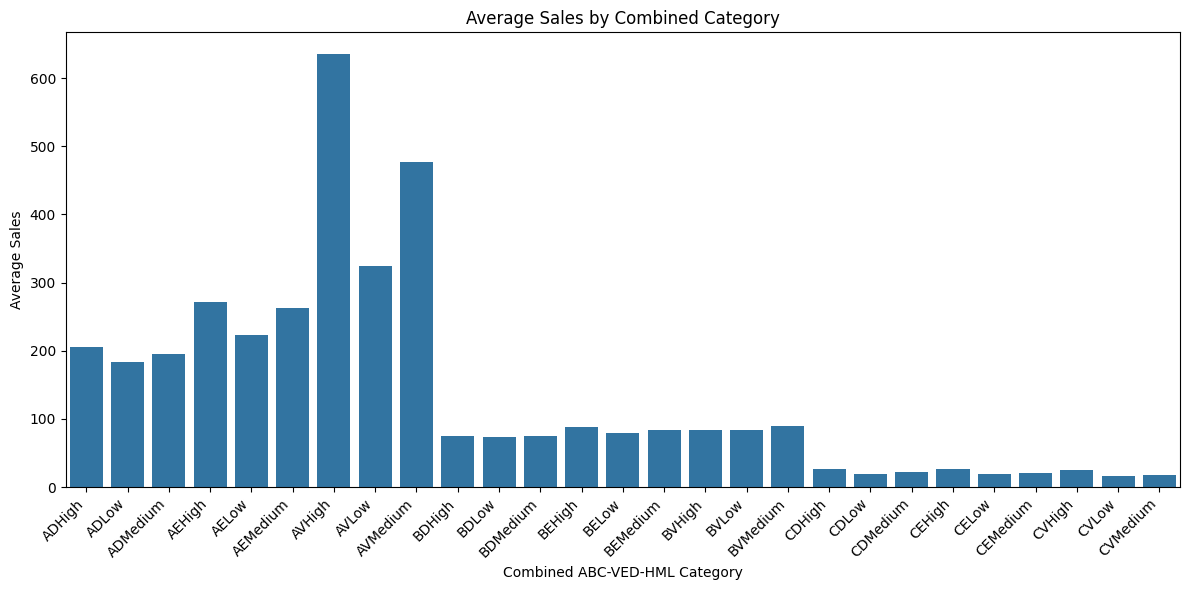

In [ ]:
# Example analysis: Group by combined category and calculate average sales
combined_category_summary = df_analysis.groupby('ABC_VED_HML_Category')['SalesDollars'].mean()
print(combined_category_summary)
# Create a barplot to visualize average sales
plt.figure(figsize=(12, 6))
sns.barplot(x=combined_category_summary.index, y=combined_category_summary.values)
plt.xlabel('Combined ABC-VED-HML Category')
plt.ylabel('Average Sales')
plt.title('Average Sales by Combined Category')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ML Models

In [ ]:
# Merge beginning and ending inventory on InventoryId
inventory_combined = pd.merge(
    beginning_inventory,
    ending_inventory[['InventoryId', 'onHand']],  # Only select existing columns
    on='InventoryId',
    suffixes=('_start', '_end')
)

# Add start and end date columns with a default value or calculated value
# Replace with your desired logic for defining startDate and endDate
inventory_combined['startDate'] = pd.to_datetime('2016-01-01')  # Example: Setting a default start date
inventory_combined['endDate'] = pd.to_datetime('2016-12-31')  # Example: Setting a default end date

print(inventory_combined.head())

         InventoryId  onHand_start  onHand_end  startDate    endDate
0  1_HARDERSFIELD_58             8          11 2016-01-01 2016-12-31
1  1_HARDERSFIELD_62             6           7 2016-01-01 2016-12-31
2  1_HARDERSFIELD_63             3           7 2016-01-01 2016-12-31
3  1_HARDERSFIELD_72             6           4 2016-01-01 2016-12-31
4  1_HARDERSFIELD_75            18           7 2016-01-01 2016-12-31


In [ ]:

# Aggregate purchase quantities by InvoiceDate and VendorName
purchase_summary = purchase_invoices.groupby(['InvoiceDate', 'VendorName']).agg({
    'Quantity': 'sum',
    'Dollars': 'sum'
}).reset_index()

print(purchase_summary.head())


  InvoiceDate                   VendorName  Quantity   Dollars
0  2016-01-04  ALTAMAR BRANDS LLC                  6    214.26
1  2016-01-04  FABRIZIA SPIRITS LLC               46    394.04
2  2016-01-04  PINE STATE TRADING CO            2334  15276.52
3  2016-01-04  TAKARA SAKE USA INC                12     55.08
4  2016-01-04  VINEXTRA INC                       24    176.04


In [ ]:
# Sort both dataframes by date to use merge_asof
inventory_combined = inventory_combined.sort_values('startDate')

# Convert 'InvoiceDate' to datetime before sorting
purchase_summary['InvoiceDate'] = pd.to_datetime(purchase_summary['InvoiceDate'])
purchase_summary = purchase_summary.sort_values('InvoiceDate')

# Use merge_asof to approximate match the InvoiceDate to startDate
final_data = pd.merge_asof(
    inventory_combined,
    purchase_summary,
    left_on='startDate',   # Match startDate
    right_on='InvoiceDate',  # Match InvoiceDate
    direction='forward'   # Match with future dates
)

# Drop InvoiceDate after merge if not needed
final_data = final_data.drop(columns=['InvoiceDate'])

final_data.head()

,InventoryId,onHand_start,onHand_end,startDate,endDate,VendorName,Quantity,Dollars
0,1_HARDERSFIELD_58,8,11,2016-01-01,2016-12-31,ALTAMAR BRANDS LLC,6,214.26
1,56_BEGGAR'S HOLE_37527,9,7,2016-01-01,2016-12-31,ALTAMAR BRANDS LLC,6,214.26
2,56_BEGGAR'S HOLE_37601,3,4,2016-01-01,2016-12-31,ALTAMAR BRANDS LLC,6,214.26
3,56_BEGGAR'S HOLE_37604,6,9,2016-01-01,2016-12-31,ALTAMAR BRANDS LLC,6,214.26
4,56_BEGGAR'S HOLE_37607,8,4,2016-01-01,2016-12-31,ALTAMAR BRANDS LLC,6,214.26


In [ ]:
final_data.isnull().sum()

,0
InventoryId,0
onHand_start,0
onHand_end,0
startDate,0
endDate,0
VendorName,0
Quantity,0
Dollars,0


In [ ]:
final_data.shape

(174976, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the 'VendorName' column
final_data['VendorName'] = le.fit_transform(final_data['VendorName'])

# Fit and transform the 'InventoryId' column
final_data['InventoryId'] = le.fit_transform(final_data['InventoryId'])

print(final_data.head())

   InventoryId  onHand_start  onHand_end  startDate    endDate  VendorName  \
0        21331             8          11 2016-01-01 2016-12-31           0   
1       104805             9           7 2016-01-01 2016-12-31           0   
2       104809             3           4 2016-01-01 2016-12-31           0   
3       104810             6           9 2016-01-01 2016-12-31           0   
4       104811             8           4 2016-01-01 2016-12-31           0   

   Quantity  Dollars  
0         6   214.26  
1         6   214.26  
2         6   214.26  
3         6   214.26  
4         6   214.26  


In [ ]:
from sklearn.model_selection import train_test_split

X = final_data.drop(['onHand_start','Quantity', 'startDate', 'endDate','Dollars'], axis=1)
y = final_data['onHand_end']

# Split the final_data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred = model_rf.predict(X_test)

# Evaluate the model_rf
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 0.05349839981712195
Mean Squared Error: 88.61279730540632
R2 Score: 0.9423719475071722


In [ ]:
results_df = pd.DataFrame({'Predicted onHand_end': y_pred, 'Actual onHand_end': y_test})

# Display the table
results_df.head(10)

,Predicted onHand_end,Actual onHand_end
136650,25.0,25
87653,7.0,7
38925,18.0,18
68979,13.0,13
135516,10.0,10
6827,75.0,75
151115,8.0,8
57674,10.0,10
150659,44.0,44
6367,31.0,31


## K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train a KNN Regressor
model_knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors
model_knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model_knn
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - Mean Absolute Error: {mae_knn}")
print(f"KNN - Mean Squared Error: {mse_knn}")
print(f"KNN - R2 Score: {r2_knn}")


KNN - Mean Absolute Error: 4.371196708195221
KNN - Mean Squared Error: 303.27194650817233
KNN - R2 Score: 0.802771471114492


In [ ]:
results_df_knn = pd.DataFrame({'Predicted onHand_end': y_pred_knn, 'Actual onHand_end': y_test})

# Display the table
results_df_knn.head(10)

,Predicted onHand_end,Actual onHand_end
136650,20.2,25
87653,7.2,7
38925,15.2,18
68979,12.2,13
135516,7.2,10
6827,74.4,75
151115,8.8,8
57674,8.0,10
150659,42.2,44
6367,29.6,31


## SVR Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=3)  # Reduced n_components to 3
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Train SVM with adjusted parameters
model_svr = SVR(kernel='linear', C=0.1, epsilon=0.2)
model_svr.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred_svr = model_svr.predict(X_test_reduced)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVM - Mean Absolute Error: {mae_svr}")
print(f"SVM - Mean Squared Error: {mse_svr}")
print(f"SVM - R2 Score: {r2_svr}")

SVM - Mean Absolute Error: 0.1894225583232638
SVM - Mean Squared Error: 0.036151269906633
SVM - R2 Score: 0.9999764895439123


In [ ]:
results_df_knn = pd.DataFrame({'Predicted onHand_end': y_pred_svr, 'Actual onHand_end': y_test})

# Display the table
results_df_knn.head(10)

,Predicted onHand_end,Actual onHand_end
136650,25.188276,25
87653,7.196732,7
38925,18.191550,18
68979,13.193881,13
135516,10.195310,10
6827,75.164817,75
151115,8.196245,8
57674,10.195277,10
150659,44.179364,44
6367,31.185449,31


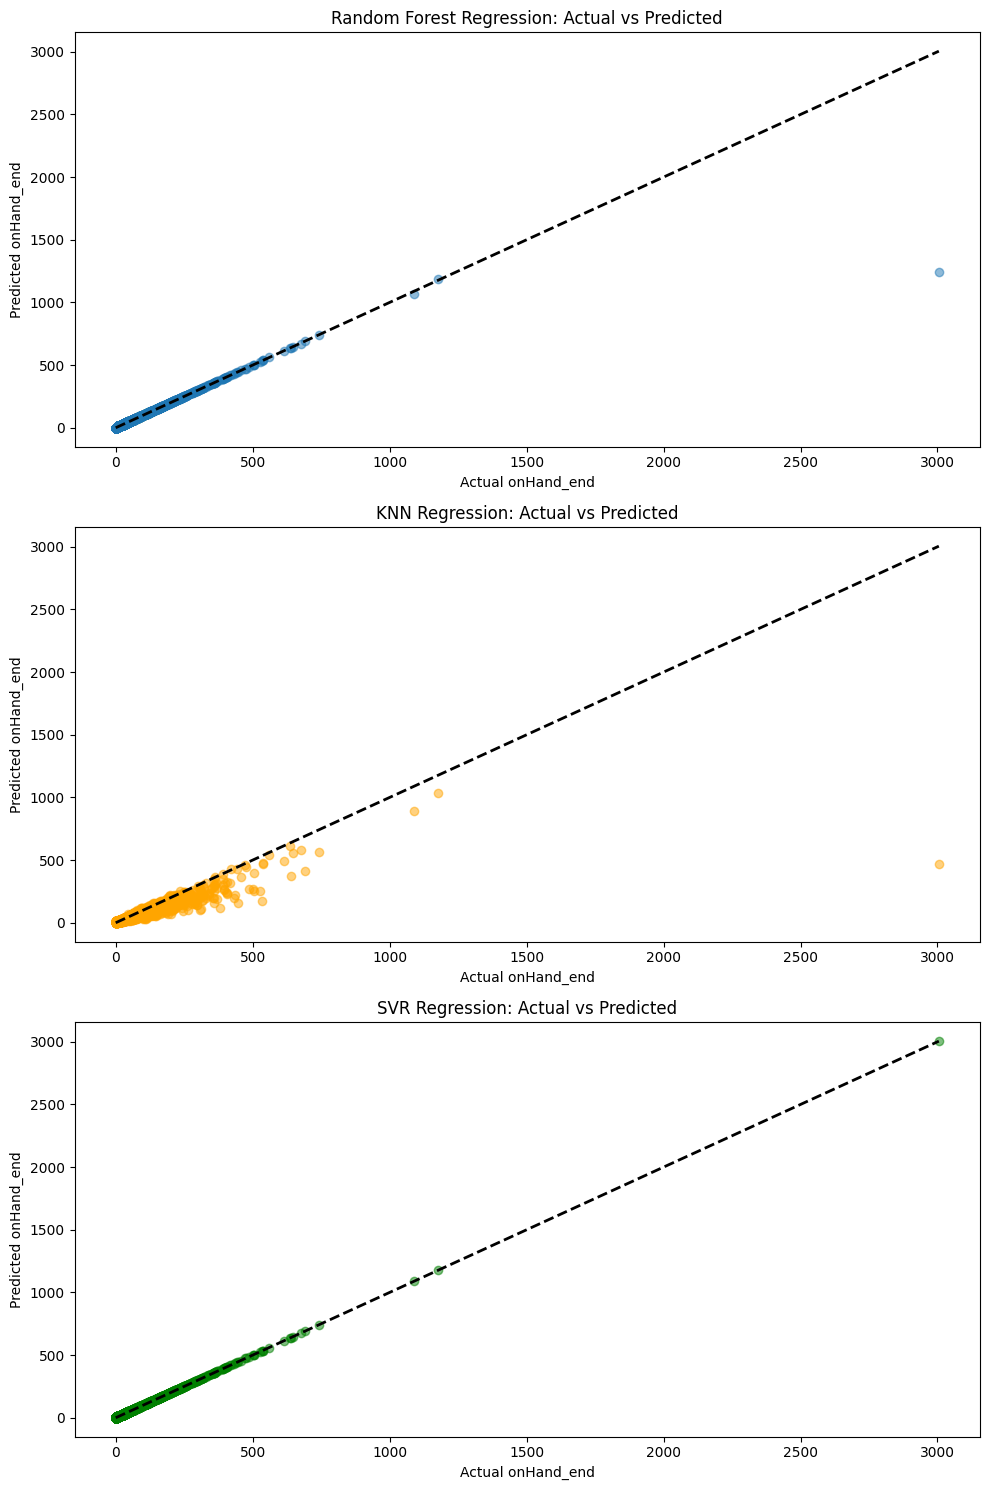

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Random Forest
axes[0].scatter(y_test, y_pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_xlabel("Actual onHand_end")
axes[0].set_ylabel("Predicted onHand_end")
axes[0].set_title("Random Forest Regression: Actual vs Predicted")


# Plot for KNN
axes[1].scatter(y_test, y_pred_knn, alpha=0.5, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel("Actual onHand_end")
axes[1].set_ylabel("Predicted onHand_end")
axes[1].set_title("KNN Regression: Actual vs Predicted")

# Plot for SVR
axes[2].scatter(y_test, y_pred_svr, alpha=0.5, color='green')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[2].set_xlabel("Actual onHand_end")
axes[2].set_ylabel("Predicted onHand_end")
axes[2].set_title("SVR Regression: Actual vs Predicted")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

## K-Means Clustering

In [ ]:
df_analysis

,InventoryId,Description,Dollars,SalesQuantity,SalesDollars,AverageOnHand,InventoryTurnover,VendorName,SalesContribution,CumulativeContribution,ABC_Category,AvgSalesQuantity,VED_Category,ABC_VED_Category,HML_Category,ABC_VED_HML_Category
0,15_WANBORNE_42188,Moet & Chandon Nectar Imp Rs,204.06,253,13279.97,29.5,8.576271,MOET HENNESSY USA INC,5.528379e-03,0.005528,A,46.833333,V,AV,High,AVHigh
1,15_WANBORNE_42188,Moet & Chandon Nectar Imp Rs,6121.80,253,13279.97,29.5,8.576271,MOET HENNESSY USA INC,5.528379e-03,0.011057,A,46.833333,V,AV,High,AVHigh
2,15_WANBORNE_42188,Moet & Chandon Nectar Imp Rs,8570.52,253,13279.97,29.5,8.576271,MOET HENNESSY USA INC,5.528379e-03,0.016585,A,46.833333,V,AV,High,AVHigh
3,15_WANBORNE_42188,Moet & Chandon Nectar Imp Rs,3060.90,253,13279.97,29.5,8.576271,MOET HENNESSY USA INC,5.528379e-03,0.022114,A,46.833333,V,AV,High,AVHigh
4,15_WANBORNE_42188,Moet & Chandon Nectar Imp Rs,2244.66,253,13279.97,29.5,8.576271,MOET HENNESSY USA INC,5.528379e-03,0.027642,A,46.833333,V,AV,High,AVHigh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911033,64_CESTERFIELD_3608,Smirnoff Orange Vodka,85.68,1,0.99,83.5,0.011976,DIAGEO NORTH AMERICA INC,4.121316e-07,99.999998,C,3.000000,D,CD,Low,CDLow
2911034,69_MOUNTMEND_3608,Smirnoff Orange Vodka,84.24,1,0.99,146.0,0.006849,DIAGEO NORTH AMERICA INC,4.121316e-07,99.999999,C,9.666667,E,CE,Low,CELow
2911035,34_PITMERDEN_8910,Finlandia Vodka,73.15,1,0.99,80.0,0.012500,BROWN-FORMAN CORP,4.121316e-07,99.999999,C,7.583333,E,CE,Low,CELow
2911036,72_HARDERSFIELD_3606,Smirnoff Raspberry Vodka,74.74,1,0.99,138.5,0.007220,DIAGEO NORTH AMERICA INC,4.121316e-07,100.000000,C,9.266667,E,CE,Low,CELow


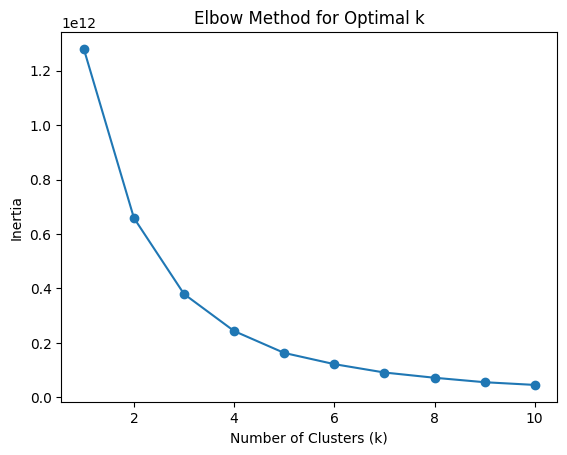

,count,mean,std,min,25%,50%,75%,max
Price_Cluster,,,,,,,,
0,2666754.0,152.458664,140.404274,0.38,58.00,98.55,198.48,671.58
1,20221.0,4619.546280,1615.508057,2906.34,3327.28,4083.81,5490.93,9792.00
2,1971.0,14999.072024,6461.169160,9819.81,10852.80,12427.04,16845.96,50175.70
3,222092.0,1192.333173,502.560639,671.60,809.10,1022.22,1419.84,2903.90


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

X = df_analysis[['Dollars']]

# Determine the optimal number of clusters (k) using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

optimal_k = 4

# K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_analysis['Price_Cluster'] = kmeans.fit_predict(X)

# Analyzing clusters
df_analysis.groupby('Price_Cluster')['Dollars'].describe()


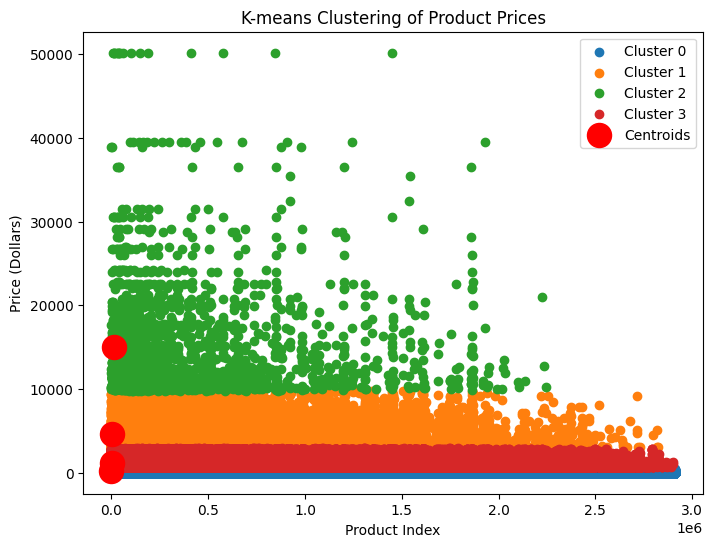

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = df_analysis[df_analysis['Price_Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['Dollars'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s=300, c='red', label='Centroids')
plt.title('K-means Clustering of Product Prices')
plt.xlabel('Product Index')
plt.ylabel('Price (Dollars)')
plt.legend()
plt.show()


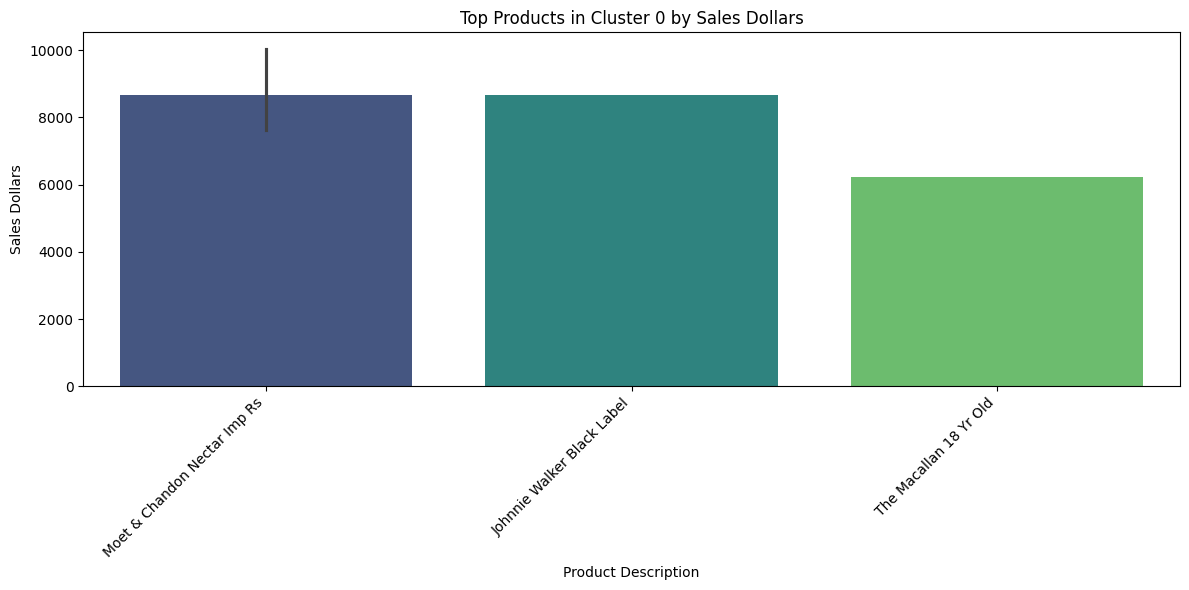

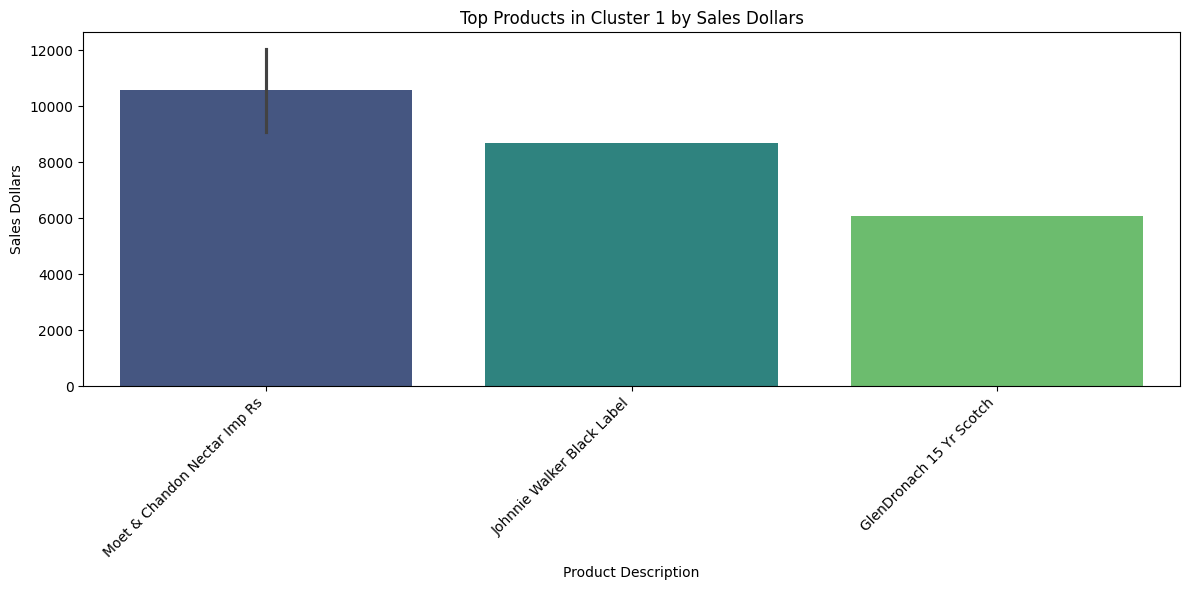

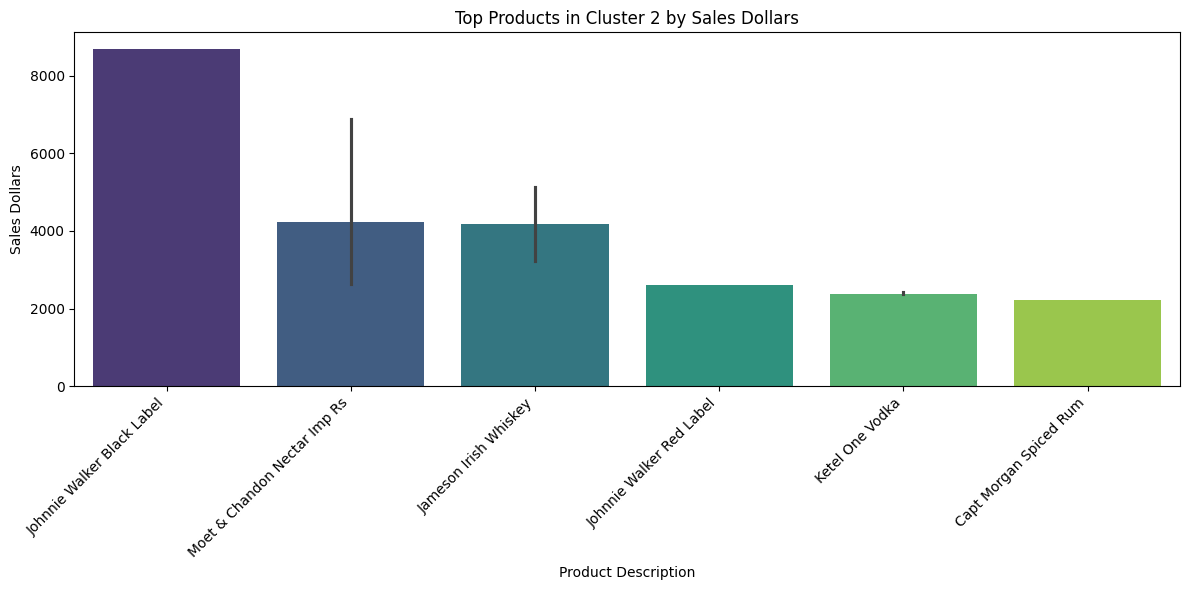

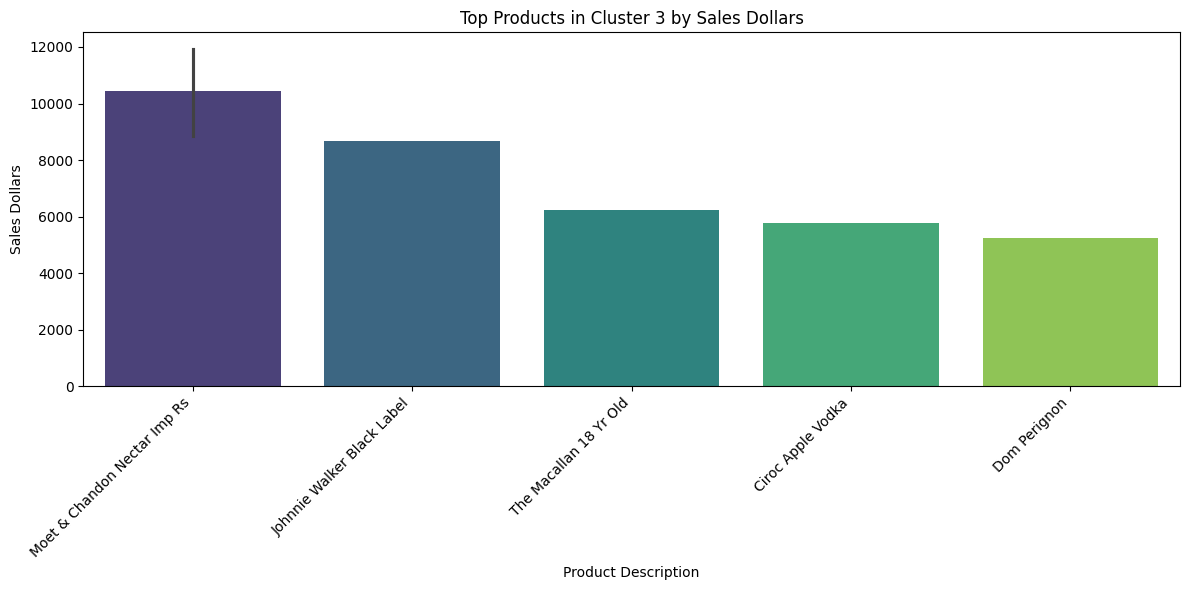

In [ ]:
#Further analysis of clusters
for cluster_num in range(optimal_k):
  cluster_products = df_analysis[df_analysis['Price_Cluster'] == cluster_num]

  #Sort products in the cluster by SalesDollars
  top_products_in_cluster = cluster_products.sort_values(by = 'SalesDollars', ascending=False).head(20)


  plt.figure(figsize=(12,6))
  sns.barplot(x='Description', y='SalesDollars', data=top_products_in_cluster, palette='viridis')
  plt.title(f'Top Products in Cluster {cluster_num} by Sales Dollars')
  plt.xlabel('Product Description')
  plt.ylabel('Sales Dollars')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()